<a href="https://colab.research.google.com/github/lollipop6370/ML2021/blob/main/HW03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset
The dataset used here is food-11, a collection of food images in 11 classes.

For the requirement in the homework, TAs slightly modified the data. Please DO NOT access the original fully-labeled training data or testing labels.

Also, the modified dataset is for this course only, and any further distribution or commercial use is forbidden.

In [ ]:
# Download the dataset
# You may choose where to download the data.

# Google Drive
!gdown --id '1awF7pZ9Dz7X1jn1_QAiKN-_v56veCEKy' --output food-11.zip

# Dropbox
# !wget https://www.dropbox.com/s/m9q6273jl3djall/food-11.zip -O food-11.zip

# MEGA
# !sudo apt install megatools
# !megadl "https://mega.nz/#!zt1TTIhK!ZuMbg5ZjGWzWX1I6nEUbfjMZgCmAgeqJlwDkqdIryfg"

# Unzip the dataset.
# This may take some time.
!unzip -q food-11.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1awF7pZ9Dz7X1jn1_QAiKN-_v56veCEKy
From (redirected): https://drive.google.com/uc?id=1awF7pZ9Dz7X1jn1_QAiKN-_v56veCEKy&confirm=t&uuid=d8486a39-3152-4c3b-8517-a0964807e2db
To: /content/food-11.zip
100% 963M/963M [00:09<00:00, 104MB/s]


# Import Packages
First, we need to import packages that will be used later.

In this homework, we highly rely on torchvision, a library of PyTorch.

In [ ]:
# Import necessary packages.
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset, TensorDataset, Dataset
from torchvision.datasets import DatasetFolder

# This is for the progress bar.
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

# Dataset, Data Loader, and Transforms
Torchvision provides lots of useful utilities for image preprocessing, data wrapping as well as data augmentation.

Here, since our data are stored in folders by class labels, we can directly apply torchvision.datasets.DatasetFolder for wrapping data without much effort.

Please refer to PyTorch official website for details about different transforms.

In [ ]:
# It is important to do data augmentation in training.
# However, not every augmentation is useful.
# Please think about what kind of augmentation is helpful for food recognition.
train_tfm = transforms.Compose([
    # Resize the image into a fixed shape (height = width = 128)
    #transforms.Resize((128, 128)),
    transforms.RandomResizedCrop(size=128, scale=(0.6, 1.0)),
    # You may add some transforms here.
    # random horizon flip
    transforms.RandomHorizontalFlip(p=0.5),

    # Color Jitter
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    # Random Rotation
    transforms.RandomRotation(15),
    # Random Affine
    #transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    # Random Grays
    #transforms.RandomGrayscale(p=0.1),
    # ToTensor() should be the last one of the transforms.
    transforms.ToTensor(),
])

# We don't need augmentations in testing and validation.
# All we need here is to resize the PIL image and transform it into Tensor.
test_tfm = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [ ]:
# Batch size for training, validation, and testing.
# A greater batch size usually gives a more stable gradient.
# But the GPU memory is limited, so please adjust it carefully.
batch_size = 128

# Construct datasets.
# The argument "loader" tells how torchvision reads the data.
train_set = DatasetFolder("food-11/training/labeled", loader=lambda x: Image.open(x), extensions="jpg", transform=train_tfm)
valid_set = DatasetFolder("food-11/validation", loader=lambda x: Image.open(x), extensions="jpg", transform=test_tfm)
unlabeled_set = DatasetFolder("food-11/training/unlabeled", loader=lambda x: Image.open(x), extensions="jpg", transform=train_tfm)
test_set = DatasetFolder("food-11/testing", loader=lambda x: Image.open(x), extensions="jpg", transform=test_tfm)

# Construct data loaders.
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# 自訂 dataset

In [ ]:
class MyDataset(Dataset):
    def __init__(self, imgs_tensor, labels_tensor):
        self.imgs_tensor = imgs_tensor
        self.labels_tensor = labels_tensor.tolist()

    def __getitem__(self, index):
        return self.imgs_tensor[index], self.labels_tensor[index]

    def __len__(self):
        return self.imgs_tensor.size(0)

# Residual Convolution Block ( 未完成 )

In [ ]:
class Block(nn.Module):
    def __init__(self, input_dim, output_dim, stride):
        super().__init__()


# Module

In [ ]:
class Classification(nn.Module):
    def __init__(self):
        super().__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # image size : [3, 128, 128]
        self.cnn_net = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),  # [64, 128/2, 128/2]

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),  # [128, 64/2, 64/2]

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(4, 4, 0)  # [256, 32/4, 32/4]
        )
        # output of cnn_net size is [batch size, 256, 8, 8]
        # input of fc_net need [batch size, xxx], use flatten
        self.fc_net = nn.Sequential(
            nn.Linear(256 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 11)
        )

    def forward(self, image):
        # input: [batch size, 3, 128, 128]
        # output: [batch size, 11]

        cnn_data = self.cnn_net(image)
        # The extracted feature map must be flatten before going to fully-connected layers.
        data = cnn_data.flatten(1)
        pred = self.fc_net(data)
        return pred

# Training

In [ ]:
# using model to generate pseudo-labels
def get_pseudo_labels(dataset, model, threshold=0.8):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    # create dataloader
    unlabel_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=8, pin_memory=True)

    # change mode
    model.eval()

    # define softmax
    softmax = nn.Softmax(dim=-1)

    # psudo-label data
    confident_images = []
    confident_labels = []

    # use model to predict labels
    for imgs, _ in unlabel_loader:
        imgs = imgs.to(device)
        with torch.no_grad():
            pred = model(imgs)
            prob = softmax(pred)

            # take the max probability and index
            max_prob, labels = torch.max(prob, dim=1)

            # filter out information whose confidence level exceeds the threshold
            filter_data = max_prob >= threshold

            # use the filter to choose satisfy data
            imgs = imgs[filter_data]
            labels = labels[filter_data]

            # save data
            #confident_images.extend(imgs.cpu())
            #confident_labels.extend(labels.cpu())
            confident_images.append(imgs)
            confident_labels.append(labels)

    # change list to tensor
    if confident_images:
        #pseudo_images = torch.stack(confident_images)
        #pseudo_labels = torch.stack(confident_labels)
        pseudo_images = torch.cat(confident_images)
        pseudo_labels = torch.cat(confident_labels)
        pseudo_images.cpu()
        pseudo_labels.cpu()
        pseudo_dataset = MyDataset(pseudo_images, pseudo_labels)
        return pseudo_dataset

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
semi_supervise = True
data_loader = train_loader

# initialize module and put it to device.
model = Classification()
model = model.to(device)
epochs = 120

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# define learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-6)

# define loss criterion
criterion = nn.CrossEntropyLoss()

total_loss, total_acc = [], []
# train epochs times
for epoch in range(epochs):

    # produce sudo-level data
    if semi_supervise and epoch > 20:
        pseudo_dataset = get_pseudo_labels(unlabeled_set, model, threshold=0.65)
        if pseudo_dataset:
            combined_dataset = ConcatDataset([train_set, pseudo_dataset])
            data_loader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

    accuracy, loss_array = [], []

    # start training
    # change module to train.
    model.train()
    # use train_loader to train
    for imgs, labels in data_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        # use model to predict
        pred = model(imgs)

        # loss function
        loss = criterion(pred, labels)

        # rule 0 and calculation gradian
        optimizer.zero_grad()
        loss.backward()

        # Clip the gradient norms for stable training
        grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # update model
        optimizer.step()

        # calculation accuracy
        acc = (pred.argmax(dim=-1) == labels).float().mean()

        # record result
        accuracy.append(acc.item())
        loss_array.append(loss.item())
        print(f"accuracy = {acc}, loss = {loss}")

    # update scheduler
    scheduler.step()

    avg_acc = sum(accuracy) / len(accuracy)
    avg_loss = sum(loss_array) / len(loss_array)
    print(f"training average accuracy = {avg_acc}, training average loss = {avg_loss}")

    # validation
    # change to eval
    model.eval()

    validation_acc, validation_loss = [], []
    for imgs, labels in tqdm(valid_loader):
        # to device
        imgs = imgs.to(device)
        labels = labels.to(device)
        # predict from model
        with torch.no_grad(): # this can help fast
            pred = model(imgs)

        # We can still compute the loss (but not the gradient).
        loss = criterion(pred, labels)

        # calc accuracy
        acc = (pred.argmax(dim=-1) == labels).float().mean()

        # record
        validation_acc.append(acc.item())
        validation_loss.append(loss.item())

    avg_vali_acc = sum(validation_acc) / len(validation_acc)
    avg_vali_loss = sum(validation_loss) / len(validation_loss)
    total_loss.append(avg_vali_loss)
    total_acc.append(avg_vali_acc)
    print(f"validate average accuracy each epoch = ", avg_vali_acc)
    print(f"validate average loss each epoch = ", avg_vali_loss)


accuracy = 0.140625, loss = 2.395031213760376
accuracy = 0.078125, loss = 2.420964002609253
accuracy = 0.0625, loss = 2.4665513038635254
accuracy = 0.0546875, loss = 2.3803281784057617
accuracy = 0.140625, loss = 2.345700263977051
accuracy = 0.0859375, loss = 2.3819563388824463
accuracy = 0.15625, loss = 2.3302154541015625
accuracy = 0.1328125, loss = 2.3225977420806885
accuracy = 0.1171875, loss = 2.3286712169647217
accuracy = 0.1796875, loss = 2.296142101287842
accuracy = 0.1953125, loss = 2.2718217372894287
accuracy = 0.1875, loss = 2.254892349243164
accuracy = 0.1796875, loss = 2.289116859436035
accuracy = 0.1796875, loss = 2.237859010696411
accuracy = 0.2109375, loss = 2.304429531097412
accuracy = 0.1640625, loss = 2.2393722534179688
accuracy = 0.2109375, loss = 2.218085765838623
accuracy = 0.265625, loss = 2.182774782180786
accuracy = 0.1640625, loss = 2.2705435752868652
accuracy = 0.2265625, loss = 2.2324819564819336
accuracy = 0.2421875, loss = 2.160362720489502
accuracy = 0.21

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.10546875
validate average loss each epoch =  2.4640320936838784
accuracy = 0.1953125, loss = 2.2617945671081543
accuracy = 0.21875, loss = 2.2057714462280273
accuracy = 0.1796875, loss = 2.173527956008911
accuracy = 0.2265625, loss = 2.1471493244171143
accuracy = 0.234375, loss = 2.1451120376586914
accuracy = 0.234375, loss = 2.1435675621032715
accuracy = 0.2734375, loss = 2.0620810985565186
accuracy = 0.25, loss = 2.1452243328094482
accuracy = 0.28125, loss = 2.05698299407959
accuracy = 0.2265625, loss = 2.1437339782714844
accuracy = 0.25, loss = 2.194077253341675
accuracy = 0.21875, loss = 2.200468063354492
accuracy = 0.265625, loss = 1.9866770505905151
accuracy = 0.3046875, loss = 2.132232904434204
accuracy = 0.1875, loss = 2.152771234512329
accuracy = 0.234375, loss = 2.088923454284668
accuracy = 0.2734375, loss = 2.109884023666382
accuracy = 0.2421875, loss = 2.086371660232544
accuracy = 0.234375, loss = 2.101914405822754
accuracy = 0.1406

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.20208333432674408
validate average loss each epoch =  2.174025575319926
accuracy = 0.2578125, loss = 2.0953102111816406
accuracy = 0.21875, loss = 2.146350622177124
accuracy = 0.2265625, loss = 2.162076234817505
accuracy = 0.3125, loss = 2.028355121612549
accuracy = 0.265625, loss = 2.0691800117492676
accuracy = 0.2734375, loss = 2.096433639526367
accuracy = 0.296875, loss = 1.9570839405059814
accuracy = 0.3046875, loss = 1.9909456968307495
accuracy = 0.3125, loss = 1.9481120109558105
accuracy = 0.328125, loss = 2.0161776542663574
accuracy = 0.2734375, loss = 2.061662435531616
accuracy = 0.3515625, loss = 1.8566482067108154
accuracy = 0.28125, loss = 2.122676372528076
accuracy = 0.3125, loss = 2.02101731300354
accuracy = 0.2890625, loss = 2.0387964248657227
accuracy = 0.1875, loss = 2.1559596061706543
accuracy = 0.3203125, loss = 1.9611483812332153
accuracy = 0.2734375, loss = 2.0328691005706787
accuracy = 0.328125, loss = 1.957141399383545
acc

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.2919270843267441
validate average loss each epoch =  1.9755498170852661
accuracy = 0.234375, loss = 2.120353937149048
accuracy = 0.28125, loss = 1.9804904460906982
accuracy = 0.3125, loss = 1.9892433881759644
accuracy = 0.2421875, loss = 2.1064987182617188
accuracy = 0.25, loss = 2.0680062770843506
accuracy = 0.296875, loss = 2.029442071914673
accuracy = 0.3125, loss = 1.9752545356750488
accuracy = 0.3203125, loss = 1.9610902070999146
accuracy = 0.3359375, loss = 2.0888772010803223
accuracy = 0.3046875, loss = 1.9700716733932495
accuracy = 0.296875, loss = 1.9868853092193604
accuracy = 0.28125, loss = 1.9775032997131348
accuracy = 0.296875, loss = 1.9727610349655151
accuracy = 0.2890625, loss = 1.9572019577026367
accuracy = 0.2265625, loss = 2.1067802906036377
accuracy = 0.3203125, loss = 1.949774146080017
accuracy = 0.3125, loss = 2.000192165374756
accuracy = 0.296875, loss = 1.9549528360366821
accuracy = 0.3359375, loss = 1.9005316495895386
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.31406250099341076
validate average loss each epoch =  1.928983449935913
accuracy = 0.3125, loss = 2.0011134147644043
accuracy = 0.328125, loss = 2.0612335205078125
accuracy = 0.3828125, loss = 1.9952548742294312
accuracy = 0.3125, loss = 2.0322368144989014
accuracy = 0.28125, loss = 1.9881352186203003
accuracy = 0.3046875, loss = 1.8294895887374878
accuracy = 0.328125, loss = 2.020045757293701
accuracy = 0.296875, loss = 1.929577350616455
accuracy = 0.359375, loss = 1.9025769233703613
accuracy = 0.359375, loss = 1.9120255708694458
accuracy = 0.3046875, loss = 1.9208048582077026
accuracy = 0.34375, loss = 2.00622820854187
accuracy = 0.390625, loss = 1.9168773889541626
accuracy = 0.328125, loss = 1.9191358089447021
accuracy = 0.296875, loss = 2.0805153846740723
accuracy = 0.390625, loss = 1.8254644870758057
accuracy = 0.2265625, loss = 2.0721781253814697
accuracy = 0.375, loss = 1.8914563655853271
accuracy = 0.328125, loss = 1.9792072772979736
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.2955729166666667
validate average loss each epoch =  1.9447935422261555
accuracy = 0.328125, loss = 1.9418152570724487
accuracy = 0.3828125, loss = 1.8628714084625244
accuracy = 0.3125, loss = 1.9995999336242676
accuracy = 0.3203125, loss = 2.0169003009796143
accuracy = 0.28125, loss = 1.9718968868255615
accuracy = 0.3359375, loss = 1.9775816202163696
accuracy = 0.34375, loss = 1.88407301902771
accuracy = 0.359375, loss = 1.8918228149414062
accuracy = 0.34375, loss = 1.981587290763855
accuracy = 0.2734375, loss = 1.9231724739074707
accuracy = 0.265625, loss = 2.024529457092285
accuracy = 0.2265625, loss = 2.047344207763672
accuracy = 0.2734375, loss = 2.111351251602173
accuracy = 0.3203125, loss = 1.9163827896118164
accuracy = 0.2578125, loss = 2.084074020385742
accuracy = 0.2890625, loss = 2.029245138168335
accuracy = 0.3125, loss = 1.9967296123504639
accuracy = 0.3828125, loss = 1.8789677619934082
accuracy = 0.28125, loss = 1.983745813369751


  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.2989583338300387
validate average loss each epoch =  2.0058910250663757
accuracy = 0.265625, loss = 1.9778159856796265
accuracy = 0.3125, loss = 1.9308797121047974
accuracy = 0.3515625, loss = 1.8407764434814453
accuracy = 0.328125, loss = 1.9780949354171753
accuracy = 0.234375, loss = 2.05399227142334
accuracy = 0.34375, loss = 1.9293209314346313
accuracy = 0.3046875, loss = 2.036728858947754
accuracy = 0.296875, loss = 2.015874147415161
accuracy = 0.3125, loss = 2.003237247467041
accuracy = 0.28125, loss = 2.0140316486358643
accuracy = 0.3046875, loss = 2.0252065658569336
accuracy = 0.359375, loss = 1.9632986783981323
accuracy = 0.34375, loss = 1.9310376644134521
accuracy = 0.3984375, loss = 1.8232932090759277
accuracy = 0.2890625, loss = 2.062152624130249
accuracy = 0.2890625, loss = 2.0294573307037354
accuracy = 0.28125, loss = 1.965238094329834
accuracy = 0.296875, loss = 1.9488650560379028
accuracy = 0.2734375, loss = 2.0657830238342285
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.2960937519868215
validate average loss each epoch =  1.9636675318082173
accuracy = 0.34375, loss = 1.9726238250732422
accuracy = 0.296875, loss = 1.9400882720947266
accuracy = 0.328125, loss = 1.9953440427780151
accuracy = 0.3671875, loss = 1.8865811824798584
accuracy = 0.265625, loss = 1.9820109605789185
accuracy = 0.3125, loss = 1.9256755113601685
accuracy = 0.34375, loss = 1.909720540046692
accuracy = 0.2578125, loss = 2.0011539459228516
accuracy = 0.3203125, loss = 1.9911057949066162
accuracy = 0.2421875, loss = 2.0677480697631836
accuracy = 0.328125, loss = 1.9418939352035522
accuracy = 0.34375, loss = 1.9384061098098755
accuracy = 0.3671875, loss = 1.8958662748336792
accuracy = 0.359375, loss = 1.920905351638794
accuracy = 0.2890625, loss = 2.0081865787506104
accuracy = 0.3125, loss = 2.0112321376800537
accuracy = 0.265625, loss = 2.0623552799224854
accuracy = 0.2890625, loss = 1.9909305572509766
accuracy = 0.3828125, loss = 1.95494496822

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3195312519868215
validate average loss each epoch =  1.9350091616312664
accuracy = 0.3359375, loss = 1.9754647016525269
accuracy = 0.3359375, loss = 1.9932860136032104
accuracy = 0.3359375, loss = 1.8775042295455933
accuracy = 0.328125, loss = 1.9054843187332153
accuracy = 0.265625, loss = 1.99062979221344
accuracy = 0.390625, loss = 1.8328429460525513
accuracy = 0.3125, loss = 1.8847298622131348
accuracy = 0.390625, loss = 1.846665620803833
accuracy = 0.234375, loss = 2.040128707885742
accuracy = 0.3046875, loss = 1.9880969524383545
accuracy = 0.328125, loss = 1.9015339612960815
accuracy = 0.3828125, loss = 1.7980149984359741
accuracy = 0.3203125, loss = 1.983353614807129
accuracy = 0.28125, loss = 1.951270580291748
accuracy = 0.328125, loss = 1.9268169403076172
accuracy = 0.375, loss = 1.9104465246200562
accuracy = 0.375, loss = 1.8895528316497803
accuracy = 0.1953125, loss = 2.1263232231140137
accuracy = 0.2734375, loss = 1.929330825805664
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3125
validate average loss each epoch =  1.9381062984466553
accuracy = 0.359375, loss = 1.8350486755371094
accuracy = 0.3125, loss = 2.0608348846435547
accuracy = 0.421875, loss = 1.8333982229232788
accuracy = 0.3203125, loss = 1.9917775392532349
accuracy = 0.34375, loss = 1.9068182706832886
accuracy = 0.359375, loss = 1.926914095878601
accuracy = 0.3671875, loss = 1.9066518545150757
accuracy = 0.359375, loss = 1.7713292837142944
accuracy = 0.3515625, loss = 1.8815796375274658
accuracy = 0.234375, loss = 2.0208253860473633
accuracy = 0.34375, loss = 1.8837332725524902
accuracy = 0.3203125, loss = 1.8685115575790405
accuracy = 0.265625, loss = 2.0957484245300293
accuracy = 0.375, loss = 1.8082138299942017
accuracy = 0.3828125, loss = 1.900029182434082
accuracy = 0.3203125, loss = 1.9656429290771484
accuracy = 0.453125, loss = 1.7978217601776123
accuracy = 0.3515625, loss = 1.9041869640350342
accuracy = 0.359375, loss = 1.8849728107452393
accurac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3596354176600774
validate average loss each epoch =  1.8632501363754272
accuracy = 0.34375, loss = 1.8182268142700195
accuracy = 0.40625, loss = 1.7674188613891602
accuracy = 0.4296875, loss = 1.7774900197982788
accuracy = 0.3359375, loss = 1.796935796737671
accuracy = 0.390625, loss = 1.7575836181640625
accuracy = 0.3984375, loss = 1.8624253273010254
accuracy = 0.3203125, loss = 1.8930696249008179
accuracy = 0.28125, loss = 1.9894051551818848
accuracy = 0.3515625, loss = 1.894294261932373
accuracy = 0.3671875, loss = 1.8047971725463867
accuracy = 0.328125, loss = 1.980762243270874
accuracy = 0.359375, loss = 1.8858399391174316
accuracy = 0.328125, loss = 1.8743579387664795
accuracy = 0.3828125, loss = 1.7865760326385498
accuracy = 0.359375, loss = 1.732698678970337
accuracy = 0.3984375, loss = 1.8191672563552856
accuracy = 0.3125, loss = 1.9180819988250732
accuracy = 0.34375, loss = 1.9186638593673706
accuracy = 0.3671875, loss = 1.79532325267

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3507812519868215
validate average loss each epoch =  1.8431885242462158
accuracy = 0.3515625, loss = 1.785876750946045
accuracy = 0.4140625, loss = 1.7184996604919434
accuracy = 0.359375, loss = 1.8717114925384521
accuracy = 0.265625, loss = 1.89961838722229
accuracy = 0.34375, loss = 1.8239753246307373
accuracy = 0.4375, loss = 1.7122091054916382
accuracy = 0.4375, loss = 1.7366228103637695
accuracy = 0.34375, loss = 1.8333756923675537
accuracy = 0.4453125, loss = 1.7769113779067993
accuracy = 0.34375, loss = 1.7678426504135132
accuracy = 0.359375, loss = 1.875948429107666
accuracy = 0.3984375, loss = 1.7276991605758667
accuracy = 0.4140625, loss = 1.7626012563705444
accuracy = 0.3359375, loss = 1.8220709562301636
accuracy = 0.375, loss = 1.828139305114746
accuracy = 0.4296875, loss = 1.7774919271469116
accuracy = 0.375, loss = 1.8119711875915527
accuracy = 0.390625, loss = 1.7503515481948853
accuracy = 0.359375, loss = 1.8672133684158325
accu

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.38124999900658924
validate average loss each epoch =  1.7525075872739155
accuracy = 0.46875, loss = 1.7667686939239502
accuracy = 0.4296875, loss = 1.698292851448059
accuracy = 0.40625, loss = 1.7253743410110474
accuracy = 0.3828125, loss = 1.7243337631225586
accuracy = 0.3515625, loss = 1.8112082481384277
accuracy = 0.390625, loss = 1.70481538772583
accuracy = 0.359375, loss = 1.77061128616333
accuracy = 0.484375, loss = 1.6749558448791504
accuracy = 0.421875, loss = 1.6819533109664917
accuracy = 0.390625, loss = 1.6270642280578613
accuracy = 0.421875, loss = 1.7334688901901245
accuracy = 0.453125, loss = 1.722438097000122
accuracy = 0.3125, loss = 1.9223008155822754
accuracy = 0.3984375, loss = 1.7397840023040771
accuracy = 0.3515625, loss = 1.8513597249984741
accuracy = 0.484375, loss = 1.7094968557357788
accuracy = 0.4375, loss = 1.6838995218276978
accuracy = 0.328125, loss = 1.7370749711990356
accuracy = 0.46875, loss = 1.6819357872009277


  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3664062519868215
validate average loss each epoch =  1.7732694745063782
accuracy = 0.3828125, loss = 1.7094707489013672
accuracy = 0.4140625, loss = 1.7341164350509644
accuracy = 0.3984375, loss = 1.8017629384994507
accuracy = 0.453125, loss = 1.6720709800720215
accuracy = 0.4375, loss = 1.7952148914337158
accuracy = 0.46875, loss = 1.5855754613876343
accuracy = 0.3984375, loss = 1.7138534784317017
accuracy = 0.375, loss = 1.8207861185073853
accuracy = 0.4140625, loss = 1.670431137084961
accuracy = 0.453125, loss = 1.5704537630081177
accuracy = 0.453125, loss = 1.7258186340332031
accuracy = 0.4296875, loss = 1.722585916519165
accuracy = 0.3828125, loss = 1.792971134185791
accuracy = 0.3359375, loss = 1.8426071405410767
accuracy = 0.4140625, loss = 1.8025901317596436
accuracy = 0.3359375, loss = 1.6892273426055908
accuracy = 0.4140625, loss = 1.7453354597091675
accuracy = 0.40625, loss = 1.675774097442627
accuracy = 0.359375, loss = 1.7115689516

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3986979176600774
validate average loss each epoch =  1.7087691028912861
accuracy = 0.3828125, loss = 1.7708731889724731
accuracy = 0.390625, loss = 1.6989320516586304
accuracy = 0.390625, loss = 1.676783561706543
accuracy = 0.375, loss = 1.6845029592514038
accuracy = 0.4296875, loss = 1.7940912246704102
accuracy = 0.3046875, loss = 1.8160343170166016
accuracy = 0.4296875, loss = 1.652750849723816
accuracy = 0.3984375, loss = 1.809211015701294
accuracy = 0.4296875, loss = 1.7080111503601074
accuracy = 0.40625, loss = 1.6599055528640747
accuracy = 0.4296875, loss = 1.6794160604476929
accuracy = 0.3984375, loss = 1.7136080265045166
accuracy = 0.3984375, loss = 1.7852758169174194
accuracy = 0.40625, loss = 1.7826104164123535
accuracy = 0.390625, loss = 1.6967769861221313
accuracy = 0.4296875, loss = 1.6918519735336304
accuracy = 0.4296875, loss = 1.61663818359375
accuracy = 0.4296875, loss = 1.6534720659255981
accuracy = 0.5234375, loss = 1.6123266

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3859375019868215
validate average loss each epoch =  1.7842292189598083
accuracy = 0.4296875, loss = 1.7453712224960327
accuracy = 0.5234375, loss = 1.6661760807037354
accuracy = 0.4375, loss = 1.6883487701416016
accuracy = 0.3984375, loss = 1.7037564516067505
accuracy = 0.46875, loss = 1.6280235052108765
accuracy = 0.3515625, loss = 1.7452449798583984
accuracy = 0.375, loss = 1.741236925125122
accuracy = 0.421875, loss = 1.710166573524475
accuracy = 0.40625, loss = 1.6270878314971924
accuracy = 0.3984375, loss = 1.6968798637390137
accuracy = 0.3671875, loss = 1.7798362970352173
accuracy = 0.3515625, loss = 1.769034504890442
accuracy = 0.4140625, loss = 1.7333883047103882
accuracy = 0.3203125, loss = 1.8358086347579956
accuracy = 0.390625, loss = 1.7401297092437744
accuracy = 0.40625, loss = 1.8080271482467651
accuracy = 0.46875, loss = 1.624117374420166
accuracy = 0.3984375, loss = 1.7065023183822632
accuracy = 0.375, loss = 1.7460670471191406

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.42682292064030963
validate average loss each epoch =  1.7258945504824321
accuracy = 0.390625, loss = 1.7262905836105347
accuracy = 0.421875, loss = 1.6954407691955566
accuracy = 0.3984375, loss = 1.8225312232971191
accuracy = 0.421875, loss = 1.751386284828186
accuracy = 0.3828125, loss = 1.6827527284622192
accuracy = 0.3984375, loss = 1.6675448417663574
accuracy = 0.4140625, loss = 1.7772382497787476
accuracy = 0.46875, loss = 1.6327959299087524
accuracy = 0.3984375, loss = 1.7777947187423706
accuracy = 0.3515625, loss = 1.806718111038208
accuracy = 0.421875, loss = 1.7316069602966309
accuracy = 0.3515625, loss = 1.833777666091919
accuracy = 0.328125, loss = 1.8390958309173584
accuracy = 0.328125, loss = 1.8545100688934326
accuracy = 0.40625, loss = 1.7268614768981934
accuracy = 0.4609375, loss = 1.63028085231781
accuracy = 0.4296875, loss = 1.5968096256256104
accuracy = 0.390625, loss = 1.7779062986373901
accuracy = 0.3515625, loss = 1.917623

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3721354156732559
validate average loss each epoch =  1.7422074675559998
accuracy = 0.4140625, loss = 1.7905675172805786
accuracy = 0.4296875, loss = 1.6458821296691895
accuracy = 0.3515625, loss = 1.800434947013855
accuracy = 0.4375, loss = 1.6922168731689453
accuracy = 0.3359375, loss = 1.8344868421554565
accuracy = 0.421875, loss = 1.7882834672927856
accuracy = 0.3671875, loss = 1.7769324779510498
accuracy = 0.3828125, loss = 1.6487184762954712
accuracy = 0.4453125, loss = 1.6946470737457275
accuracy = 0.375, loss = 1.7961342334747314
accuracy = 0.3125, loss = 1.9336415529251099
accuracy = 0.4765625, loss = 1.6682461500167847
accuracy = 0.46875, loss = 1.5825088024139404
accuracy = 0.453125, loss = 1.6406761407852173
accuracy = 0.34375, loss = 1.7482105493545532
accuracy = 0.3515625, loss = 1.8937299251556396
accuracy = 0.3984375, loss = 1.6515142917633057
accuracy = 0.4140625, loss = 1.7009941339492798
accuracy = 0.4296875, loss = 1.64349353

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3984375
validate average loss each epoch =  1.706977387269338
accuracy = 0.3828125, loss = 1.7794747352600098
accuracy = 0.3828125, loss = 1.6324594020843506
accuracy = 0.3828125, loss = 1.9219977855682373
accuracy = 0.359375, loss = 1.8292728662490845
accuracy = 0.3515625, loss = 1.8269407749176025
accuracy = 0.4609375, loss = 1.6164048910140991
accuracy = 0.3828125, loss = 1.7604947090148926
accuracy = 0.359375, loss = 1.7766891717910767
accuracy = 0.4609375, loss = 1.6532775163650513
accuracy = 0.3828125, loss = 1.7759854793548584
accuracy = 0.3046875, loss = 1.8622931241989136
accuracy = 0.421875, loss = 1.7628743648529053
accuracy = 0.4375, loss = 1.6994105577468872
accuracy = 0.46875, loss = 1.6105927228927612
accuracy = 0.3828125, loss = 1.7005466222763062
accuracy = 0.421875, loss = 1.6330071687698364
accuracy = 0.3671875, loss = 1.7538613080978394
accuracy = 0.421875, loss = 1.730836033821106
accuracy = 0.390625, loss = 1.7094680070877

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.37942708532015484
validate average loss each epoch =  1.8224790493647258
accuracy = 0.390625, loss = 1.726311206817627
accuracy = 0.4140625, loss = 1.7628889083862305
accuracy = 0.40625, loss = 1.661355972290039
accuracy = 0.390625, loss = 1.6963762044906616
accuracy = 0.359375, loss = 1.888996958732605
accuracy = 0.453125, loss = 1.4961403608322144
accuracy = 0.359375, loss = 1.9044959545135498
accuracy = 0.375, loss = 1.715569019317627
accuracy = 0.375, loss = 1.7869243621826172
accuracy = 0.4375, loss = 1.709232211112976
accuracy = 0.4375, loss = 1.5948065519332886
accuracy = 0.375, loss = 1.8416483402252197
accuracy = 0.4375, loss = 1.5950384140014648
accuracy = 0.3125, loss = 1.8590008020401
accuracy = 0.5078125, loss = 1.5665607452392578
accuracy = 0.5078125, loss = 1.5668805837631226
accuracy = 0.3984375, loss = 1.7302614450454712
accuracy = 0.34375, loss = 1.8361409902572632
accuracy = 0.4453125, loss = 1.6615304946899414
accuracy = 0.3

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4283854166666667
validate average loss each epoch =  1.6205585797627766
accuracy = 0.4140625, loss = 1.6096655130386353
accuracy = 0.453125, loss = 1.6204783916473389
accuracy = 0.3828125, loss = 1.7431645393371582
accuracy = 0.3828125, loss = 1.7587920427322388
accuracy = 0.421875, loss = 1.7211726903915405
accuracy = 0.4140625, loss = 1.7865891456604004
accuracy = 0.4140625, loss = 1.706787109375
accuracy = 0.453125, loss = 1.681830883026123
accuracy = 0.5078125, loss = 1.4807476997375488
accuracy = 0.3671875, loss = 1.7345714569091797
accuracy = 0.4453125, loss = 1.6154718399047852
accuracy = 0.3515625, loss = 1.7111527919769287
accuracy = 0.375, loss = 1.7437255382537842
accuracy = 0.3828125, loss = 1.6636452674865723
accuracy = 0.46875, loss = 1.5481473207473755
accuracy = 0.4296875, loss = 1.6069538593292236
accuracy = 0.484375, loss = 1.658935308456421
accuracy = 0.4375, loss = 1.660909652709961
accuracy = 0.4140625, loss = 1.71472585201

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3981770823399226
validate average loss each epoch =  1.6411416331926982
accuracy = 0.3984375, loss = 1.7121962308883667
accuracy = 0.4453125, loss = 1.5810377597808838
accuracy = 0.4921875, loss = 1.6728001832962036
accuracy = 0.453125, loss = 1.6427109241485596
accuracy = 0.4140625, loss = 1.6959015130996704
accuracy = 0.4609375, loss = 1.61995530128479
accuracy = 0.453125, loss = 1.5980199575424194
accuracy = 0.4375, loss = 1.740972876548767
accuracy = 0.40625, loss = 1.6733068227767944
accuracy = 0.515625, loss = 1.5741380453109741
accuracy = 0.375, loss = 1.7000579833984375
accuracy = 0.4921875, loss = 1.46376371383667
accuracy = 0.3984375, loss = 1.7001447677612305
accuracy = 0.359375, loss = 1.6548799276351929
accuracy = 0.40625, loss = 1.692452311515808
accuracy = 0.4765625, loss = 1.4911025762557983
accuracy = 0.375, loss = 1.6472595930099487
accuracy = 0.4453125, loss = 1.6368917226791382
accuracy = 0.515625, loss = 1.505930781364441
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.43828125298023224
validate average loss each epoch =  1.608981430530548
accuracy = 0.4765625, loss = 1.5155317783355713
accuracy = 0.4140625, loss = 1.691088080406189
accuracy = 0.453125, loss = 1.5845394134521484
accuracy = 0.4296875, loss = 1.594450831413269
accuracy = 0.5625, loss = 1.4787408113479614
accuracy = 0.4609375, loss = 1.5045641660690308
accuracy = 0.4375, loss = 1.7166540622711182
accuracy = 0.53125, loss = 1.5533735752105713
accuracy = 0.4296875, loss = 1.6491409540176392
accuracy = 0.4921875, loss = 1.4954943656921387
accuracy = 0.46875, loss = 1.585811972618103
accuracy = 0.390625, loss = 1.685218095779419
accuracy = 0.5859375, loss = 1.4576753377914429
accuracy = 0.5, loss = 1.5680650472640991
accuracy = 0.46875, loss = 1.607533574104309
accuracy = 0.5078125, loss = 1.5766757726669312
accuracy = 0.4453125, loss = 1.6260067224502563
accuracy = 0.484375, loss = 1.521319031715393
accuracy = 0.453125, loss = 1.5504028797149658
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.46276041865348816
validate average loss each epoch =  1.5529273549715679
accuracy = 0.4921875, loss = 1.5151360034942627
accuracy = 0.4765625, loss = 1.5605415105819702
accuracy = 0.484375, loss = 1.5144877433776855
accuracy = 0.4609375, loss = 1.6452829837799072
accuracy = 0.3984375, loss = 1.5767382383346558
accuracy = 0.53125, loss = 1.4655841588974
accuracy = 0.53125, loss = 1.498528242111206
accuracy = 0.4765625, loss = 1.5154792070388794
accuracy = 0.40625, loss = 1.6801635026931763
accuracy = 0.453125, loss = 1.4616951942443848
accuracy = 0.5390625, loss = 1.4985178709030151
accuracy = 0.46875, loss = 1.5176255702972412
accuracy = 0.4921875, loss = 1.505068063735962
accuracy = 0.4921875, loss = 1.4520303010940552
accuracy = 0.421875, loss = 1.630250334739685
accuracy = 0.515625, loss = 1.5712924003601074
accuracy = 0.4609375, loss = 1.5955028533935547
accuracy = 0.4296875, loss = 1.6462191343307495
accuracy = 0.4921875, loss = 1.53869140

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.44348958631356555
validate average loss each epoch =  1.5570229291915894
accuracy = 0.515625, loss = 1.5007216930389404
accuracy = 0.5234375, loss = 1.4689544439315796
accuracy = 0.4375, loss = 1.596859097480774
accuracy = 0.4921875, loss = 1.5699001550674438
accuracy = 0.4453125, loss = 1.6182918548583984
accuracy = 0.4140625, loss = 1.5734217166900635
accuracy = 0.5, loss = 1.4703134298324585
accuracy = 0.421875, loss = 1.6838754415512085
accuracy = 0.375, loss = 1.5823047161102295
accuracy = 0.4921875, loss = 1.5381807088851929
accuracy = 0.5, loss = 1.553937554359436
accuracy = 0.4609375, loss = 1.584180474281311
accuracy = 0.484375, loss = 1.605093240737915
accuracy = 0.453125, loss = 1.5029031038284302
accuracy = 0.46875, loss = 1.568738341331482
accuracy = 0.484375, loss = 1.564958930015564
accuracy = 0.484375, loss = 1.5914709568023682
accuracy = 0.453125, loss = 1.6258318424224854
accuracy = 0.46875, loss = 1.56532883644104
accuracy = 

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4484375019868215
validate average loss each epoch =  1.557296613852183
accuracy = 0.5390625, loss = 1.5474909543991089
accuracy = 0.515625, loss = 1.4674170017242432
accuracy = 0.5234375, loss = 1.4751337766647339
accuracy = 0.53125, loss = 1.4729876518249512
accuracy = 0.4609375, loss = 1.5440950393676758
accuracy = 0.4375, loss = 1.5955404043197632
accuracy = 0.5234375, loss = 1.4917129278182983
accuracy = 0.484375, loss = 1.5583698749542236
accuracy = 0.40625, loss = 1.6510603427886963
accuracy = 0.4453125, loss = 1.5768921375274658
accuracy = 0.4921875, loss = 1.5062888860702515
accuracy = 0.4375, loss = 1.5945512056350708
accuracy = 0.5, loss = 1.5281274318695068
accuracy = 0.4453125, loss = 1.6436117887496948
accuracy = 0.515625, loss = 1.4663187265396118
accuracy = 0.4453125, loss = 1.5823042392730713
accuracy = 0.5, loss = 1.5177477598190308
accuracy = 0.4296875, loss = 1.6242423057556152
accuracy = 0.46875, loss = 1.5639688968658447
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.48463542262713116
validate average loss each epoch =  1.5395520528157551
accuracy = 0.4765625, loss = 1.5828707218170166
accuracy = 0.4609375, loss = 1.6659109592437744
accuracy = 0.46875, loss = 1.4607412815093994
accuracy = 0.453125, loss = 1.5942447185516357
accuracy = 0.4375, loss = 1.5196959972381592
accuracy = 0.4609375, loss = 1.5823816061019897
accuracy = 0.46875, loss = 1.5937975645065308
accuracy = 0.4609375, loss = 1.5549200773239136
accuracy = 0.484375, loss = 1.5418109893798828
accuracy = 0.4765625, loss = 1.6118813753128052
accuracy = 0.46875, loss = 1.622320532798767
accuracy = 0.4453125, loss = 1.585076093673706
accuracy = 0.4609375, loss = 1.5765031576156616
accuracy = 0.4609375, loss = 1.5138801336288452
accuracy = 0.46875, loss = 1.510827660560608
accuracy = 0.3984375, loss = 1.7497177124023438
accuracy = 0.4609375, loss = 1.5871329307556152
accuracy = 0.5, loss = 1.504817008972168
accuracy = 0.484375, loss = 1.56031453609466

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.40703125298023224
validate average loss each epoch =  1.6355049014091492
accuracy = 0.453125, loss = 1.6164425611495972
accuracy = 0.4296875, loss = 1.6085048913955688
accuracy = 0.4921875, loss = 1.5255849361419678
accuracy = 0.4609375, loss = 1.6430333852767944
accuracy = 0.375, loss = 1.7167375087738037
accuracy = 0.46875, loss = 1.4878735542297363
accuracy = 0.4453125, loss = 1.6214908361434937
accuracy = 0.4609375, loss = 1.548325777053833
accuracy = 0.546875, loss = 1.4546163082122803
accuracy = 0.4375, loss = 1.5871236324310303
accuracy = 0.4140625, loss = 1.5224292278289795
accuracy = 0.546875, loss = 1.4037138223648071
accuracy = 0.3984375, loss = 1.6865653991699219
accuracy = 0.4765625, loss = 1.5415244102478027
accuracy = 0.4609375, loss = 1.6029260158538818
accuracy = 0.4609375, loss = 1.5834201574325562
accuracy = 0.4296875, loss = 1.6714203357696533
accuracy = 0.3984375, loss = 1.6814419031143188
accuracy = 0.5078125, loss = 1.469

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4598958392937978
validate average loss each epoch =  1.5372514923413594
accuracy = 0.3984375, loss = 1.6365758180618286
accuracy = 0.390625, loss = 1.679294466972351
accuracy = 0.40625, loss = 1.783747673034668
accuracy = 0.59375, loss = 1.3014901876449585
accuracy = 0.484375, loss = 1.4882992506027222
accuracy = 0.3671875, loss = 1.878984808921814
accuracy = 0.375, loss = 1.8540441989898682
accuracy = 0.375, loss = 1.754916787147522
accuracy = 0.5546875, loss = 1.4275153875350952
accuracy = 0.515625, loss = 1.5248956680297852
accuracy = 0.375, loss = 1.6895748376846313
accuracy = 0.484375, loss = 1.5639007091522217
accuracy = 0.5, loss = 1.5249073505401611
accuracy = 0.4453125, loss = 1.653139352798462
accuracy = 0.5, loss = 1.4498445987701416
accuracy = 0.5078125, loss = 1.4689233303070068
accuracy = 0.40625, loss = 1.6615303754806519
accuracy = 0.4453125, loss = 1.5709197521209717
accuracy = 0.5078125, loss = 1.4742906093597412
accuracy = 0.

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.467187503973643
validate average loss each epoch =  1.542094846566518
accuracy = 0.46875, loss = 1.5804136991500854
accuracy = 0.3984375, loss = 1.6683659553527832
accuracy = 0.4609375, loss = 1.5032453536987305
accuracy = 0.4453125, loss = 1.6376862525939941
accuracy = 0.4453125, loss = 1.5345838069915771
accuracy = 0.5, loss = 1.5225709676742554
accuracy = 0.4140625, loss = 1.6530712842941284
accuracy = 0.4140625, loss = 1.573038935661316
accuracy = 0.4375, loss = 1.6019842624664307
accuracy = 0.4765625, loss = 1.581624150276184
accuracy = 0.46875, loss = 1.6104512214660645
accuracy = 0.4296875, loss = 1.5638525485992432
accuracy = 0.4375, loss = 1.5712425708770752
accuracy = 0.4375, loss = 1.5389280319213867
accuracy = 0.5546875, loss = 1.343827724456787
accuracy = 0.453125, loss = 1.4500588178634644
accuracy = 0.4765625, loss = 1.5450067520141602
accuracy = 0.5078125, loss = 1.519307255744934
accuracy = 0.515625, loss = 1.4871952533721924
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.3898437519868215
validate average loss each epoch =  1.7205150524775188
accuracy = 0.4765625, loss = 1.6052634716033936
accuracy = 0.390625, loss = 1.642548680305481
accuracy = 0.5, loss = 1.3642005920410156
accuracy = 0.484375, loss = 1.5490964651107788
accuracy = 0.40625, loss = 1.6131118535995483
accuracy = 0.5078125, loss = 1.3751893043518066
accuracy = 0.4453125, loss = 1.5845880508422852
accuracy = 0.4921875, loss = 1.608599305152893
accuracy = 0.4453125, loss = 1.6351876258850098
accuracy = 0.4609375, loss = 1.4969792366027832
accuracy = 0.4765625, loss = 1.4964293241500854
accuracy = 0.453125, loss = 1.5732910633087158
accuracy = 0.4765625, loss = 1.3898121118545532
accuracy = 0.453125, loss = 1.5203936100006104
accuracy = 0.5, loss = 1.545558214187622
accuracy = 0.421875, loss = 1.7441147565841675
accuracy = 0.453125, loss = 1.509793996810913
accuracy = 0.484375, loss = 1.459516167640686
accuracy = 0.5, loss = 1.4597795009613037
accura

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.45468750099341076
validate average loss each epoch =  1.5031766494115193
accuracy = 0.515625, loss = 1.4347478151321411
accuracy = 0.4921875, loss = 1.5093272924423218
accuracy = 0.4609375, loss = 1.5726170539855957
accuracy = 0.515625, loss = 1.4216978549957275
accuracy = 0.5, loss = 1.4230371713638306
accuracy = 0.5390625, loss = 1.366107702255249
accuracy = 0.4296875, loss = 1.5499188899993896
accuracy = 0.4921875, loss = 1.3923559188842773
accuracy = 0.53125, loss = 1.4456297159194946
accuracy = 0.5234375, loss = 1.48664128780365
accuracy = 0.4921875, loss = 1.513123869895935
accuracy = 0.4375, loss = 1.5982425212860107
accuracy = 0.40625, loss = 1.6210447549819946
accuracy = 0.53125, loss = 1.4484848976135254
accuracy = 0.421875, loss = 1.5906234979629517
accuracy = 0.5, loss = 1.5667680501937866
accuracy = 0.5390625, loss = 1.3663921356201172
accuracy = 0.453125, loss = 1.4671714305877686
accuracy = 0.515625, loss = 1.5244251489639282
acc

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.48255208631356555
validate average loss each epoch =  1.5323469837506611
accuracy = 0.53125, loss = 1.3734004497528076
accuracy = 0.4609375, loss = 1.519348382949829
accuracy = 0.5234375, loss = 1.397966742515564
accuracy = 0.5546875, loss = 1.3664075136184692
accuracy = 0.53125, loss = 1.3713657855987549
accuracy = 0.546875, loss = 1.4885354042053223
accuracy = 0.609375, loss = 1.2026362419128418
accuracy = 0.5625, loss = 1.4251692295074463
accuracy = 0.5078125, loss = 1.4911141395568848
accuracy = 0.5625, loss = 1.4011223316192627
accuracy = 0.421875, loss = 1.523964285850525
accuracy = 0.4921875, loss = 1.5036729574203491
accuracy = 0.4453125, loss = 1.5821696519851685
accuracy = 0.5546875, loss = 1.4830344915390015
accuracy = 0.4453125, loss = 1.6121071577072144
accuracy = 0.53125, loss = 1.3819572925567627
accuracy = 0.5078125, loss = 1.4406965970993042
accuracy = 0.5390625, loss = 1.303974986076355
accuracy = 0.515625, loss = 1.4760066270

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4723958323399226
validate average loss each epoch =  1.4961857199668884
accuracy = 0.5625, loss = 1.4079123735427856
accuracy = 0.4375, loss = 1.5198338031768799
accuracy = 0.4921875, loss = 1.4086745977401733
accuracy = 0.484375, loss = 1.4183374643325806
accuracy = 0.421875, loss = 1.5569816827774048
accuracy = 0.5078125, loss = 1.4608733654022217
accuracy = 0.53125, loss = 1.4196141958236694
accuracy = 0.53125, loss = 1.3993157148361206
accuracy = 0.546875, loss = 1.361926555633545
accuracy = 0.5859375, loss = 1.3128318786621094
accuracy = 0.515625, loss = 1.4389246702194214
accuracy = 0.5546875, loss = 1.3707473278045654
accuracy = 0.453125, loss = 1.5515934228897095
accuracy = 0.4296875, loss = 1.6188523769378662
accuracy = 0.53125, loss = 1.3726574182510376
accuracy = 0.5859375, loss = 1.2652106285095215
accuracy = 0.46875, loss = 1.514655351638794
accuracy = 0.5, loss = 1.4455950260162354
accuracy = 0.5234375, loss = 1.48103928565979
acc

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5119791726271311
validate average loss each epoch =  1.4222824772198994
accuracy = 0.609375, loss = 1.2862329483032227
accuracy = 0.4921875, loss = 1.4366555213928223
accuracy = 0.5234375, loss = 1.4040483236312866
accuracy = 0.5859375, loss = 1.4074541330337524
accuracy = 0.5625, loss = 1.407435655593872
accuracy = 0.40625, loss = 1.6198358535766602
accuracy = 0.4921875, loss = 1.4710737466812134
accuracy = 0.5, loss = 1.4952967166900635
accuracy = 0.46875, loss = 1.6258492469787598
accuracy = 0.5703125, loss = 1.341426134109497
accuracy = 0.5078125, loss = 1.4833465814590454
accuracy = 0.5625, loss = 1.3544975519180298
accuracy = 0.546875, loss = 1.3279629945755005
accuracy = 0.5078125, loss = 1.379510760307312
accuracy = 0.421875, loss = 1.5695152282714844
accuracy = 0.5546875, loss = 1.4298551082611084
accuracy = 0.546875, loss = 1.3154979944229126
accuracy = 0.5625, loss = 1.4003561735153198
accuracy = 0.5, loss = 1.413246750831604
accurac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4572916676600774
validate average loss each epoch =  1.4853646159172058
accuracy = 0.5078125, loss = 1.4889652729034424
accuracy = 0.484375, loss = 1.4247074127197266
accuracy = 0.453125, loss = 1.5559937953948975
accuracy = 0.515625, loss = 1.4803597927093506
accuracy = 0.5234375, loss = 1.435304045677185
accuracy = 0.4453125, loss = 1.4421195983886719
accuracy = 0.3984375, loss = 1.6617408990859985
accuracy = 0.5078125, loss = 1.398864984512329
accuracy = 0.5625, loss = 1.4489103555679321
accuracy = 0.5234375, loss = 1.4655826091766357
accuracy = 0.4453125, loss = 1.566562533378601
accuracy = 0.4921875, loss = 1.4674842357635498
accuracy = 0.46875, loss = 1.5880353450775146
accuracy = 0.515625, loss = 1.3891956806182861
accuracy = 0.4765625, loss = 1.5389916896820068
accuracy = 0.59375, loss = 1.2915438413619995
accuracy = 0.6015625, loss = 1.303844690322876
accuracy = 0.5, loss = 1.4855247735977173
accuracy = 0.5546875, loss = 1.346849918365

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4635416666666667
validate average loss each epoch =  1.4710302154223125
accuracy = 0.4609375, loss = 1.5124648809432983
accuracy = 0.5390625, loss = 1.3737547397613525
accuracy = 0.4140625, loss = 1.6590303182601929
accuracy = 0.4453125, loss = 1.5862573385238647
accuracy = 0.5390625, loss = 1.4096174240112305
accuracy = 0.578125, loss = 1.2985172271728516
accuracy = 0.5234375, loss = 1.4037977457046509
accuracy = 0.5234375, loss = 1.3560116291046143
accuracy = 0.4765625, loss = 1.5049971342086792
accuracy = 0.4375, loss = 1.5052272081375122
accuracy = 0.5, loss = 1.470054030418396
accuracy = 0.59375, loss = 1.3194947242736816
accuracy = 0.4765625, loss = 1.5240163803100586
accuracy = 0.5234375, loss = 1.4213662147521973
accuracy = 0.46875, loss = 1.4924595355987549
accuracy = 0.453125, loss = 1.5705749988555908
accuracy = 0.4765625, loss = 1.4947423934936523
accuracy = 0.4375, loss = 1.5952757596969604
accuracy = 0.515625, loss = 1.42569923400

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.42421874900658924
validate average loss each epoch =  1.6102259159088135
accuracy = 0.484375, loss = 1.5302263498306274
accuracy = 0.6171875, loss = 1.3226734399795532
accuracy = 0.4609375, loss = 1.3996816873550415
accuracy = 0.4765625, loss = 1.5829812288284302
accuracy = 0.375, loss = 1.7250158786773682
accuracy = 0.484375, loss = 1.5212976932525635
accuracy = 0.46875, loss = 1.4889808893203735
accuracy = 0.4375, loss = 1.535154104232788
accuracy = 0.421875, loss = 1.5842100381851196
accuracy = 0.5234375, loss = 1.4398638010025024
accuracy = 0.4765625, loss = 1.5876466035842896
accuracy = 0.46875, loss = 1.427899718284607
accuracy = 0.5625, loss = 1.4027466773986816
accuracy = 0.546875, loss = 1.3815783262252808
accuracy = 0.484375, loss = 1.454546332359314
accuracy = 0.3828125, loss = 1.6871734857559204
accuracy = 0.5, loss = 1.5006816387176514
accuracy = 0.515625, loss = 1.4537535905838013
accuracy = 0.4453125, loss = 1.5309412479400635
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4190104156732559
validate average loss each epoch =  1.577743907769521
accuracy = 0.4375, loss = 1.5184133052825928
accuracy = 0.4765625, loss = 1.4512214660644531
accuracy = 0.46875, loss = 1.518295407295227
accuracy = 0.5859375, loss = 1.3423620462417603
accuracy = 0.53125, loss = 1.4876600503921509
accuracy = 0.6015625, loss = 1.3113374710083008
accuracy = 0.484375, loss = 1.4025264978408813
accuracy = 0.4296875, loss = 1.6567977666854858
accuracy = 0.4296875, loss = 1.5224822759628296
accuracy = 0.46875, loss = 1.4552310705184937
accuracy = 0.5234375, loss = 1.3582292795181274
accuracy = 0.53125, loss = 1.4743800163269043
accuracy = 0.4921875, loss = 1.560989499092102
accuracy = 0.5078125, loss = 1.5023102760314941
accuracy = 0.359375, loss = 1.687453031539917
accuracy = 0.390625, loss = 1.5933339595794678
accuracy = 0.59375, loss = 1.3867244720458984
accuracy = 0.4765625, loss = 1.4777872562408447
accuracy = 0.4921875, loss = 1.46887588500

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.37578125049670535
validate average loss each epoch =  1.8188573519388835
accuracy = 0.4609375, loss = 1.5582456588745117
accuracy = 0.421875, loss = 1.6063350439071655
accuracy = 0.5078125, loss = 1.4988465309143066
accuracy = 0.4765625, loss = 1.4708369970321655
accuracy = 0.4296875, loss = 1.5119376182556152
accuracy = 0.4921875, loss = 1.4592465162277222
accuracy = 0.4765625, loss = 1.3567596673965454
accuracy = 0.484375, loss = 1.6080710887908936
accuracy = 0.4921875, loss = 1.6108132600784302
accuracy = 0.46875, loss = 1.5581684112548828
accuracy = 0.484375, loss = 1.5745468139648438
accuracy = 0.4765625, loss = 1.4638592004776
accuracy = 0.5234375, loss = 1.4229578971862793
accuracy = 0.546875, loss = 1.3654439449310303
accuracy = 0.46875, loss = 1.4398088455200195
accuracy = 0.4140625, loss = 1.553524136543274
accuracy = 0.484375, loss = 1.5514332056045532
accuracy = 0.5, loss = 1.542154312133789
accuracy = 0.4765625, loss = 1.5009979009

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4260416676600774
validate average loss each epoch =  1.5476233561833699
accuracy = 0.46875, loss = 1.4244227409362793
accuracy = 0.546875, loss = 1.2510563135147095
accuracy = 0.5390625, loss = 1.3240152597427368
accuracy = 0.4765625, loss = 1.5330779552459717
accuracy = 0.53125, loss = 1.2664507627487183
accuracy = 0.5703125, loss = 1.3760769367218018
accuracy = 0.4765625, loss = 1.4220809936523438
accuracy = 0.5, loss = 1.4767462015151978
accuracy = 0.4609375, loss = 1.497754454612732
accuracy = 0.453125, loss = 1.5398740768432617
accuracy = 0.5078125, loss = 1.3688849210739136
accuracy = 0.5234375, loss = 1.6042463779449463
accuracy = 0.5703125, loss = 1.2038402557373047
accuracy = 0.4609375, loss = 1.5284605026245117
accuracy = 0.5234375, loss = 1.368215560913086
accuracy = 0.4921875, loss = 1.4986087083816528
accuracy = 0.484375, loss = 1.5018386840820312
accuracy = 0.5078125, loss = 1.480491280555725
accuracy = 0.5546875, loss = 1.3264843

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4895833333333333
validate average loss each epoch =  1.466244399547577
accuracy = 0.546875, loss = 1.4558861255645752
accuracy = 0.5546875, loss = 1.3581565618515015
accuracy = 0.4921875, loss = 1.4242805242538452
accuracy = 0.4296875, loss = 1.5186450481414795
accuracy = 0.53125, loss = 1.445595145225525
accuracy = 0.5390625, loss = 1.3499705791473389
accuracy = 0.5078125, loss = 1.4694446325302124
accuracy = 0.546875, loss = 1.3921149969100952
accuracy = 0.4765625, loss = 1.4125030040740967
accuracy = 0.59375, loss = 1.2185137271881104
accuracy = 0.5390625, loss = 1.3739618062973022
accuracy = 0.609375, loss = 1.335982322692871
accuracy = 0.4921875, loss = 1.4649845361709595
accuracy = 0.5859375, loss = 1.2175849676132202
accuracy = 0.5390625, loss = 1.3883248567581177
accuracy = 0.5234375, loss = 1.4132639169692993
accuracy = 0.546875, loss = 1.4120243787765503
accuracy = 0.578125, loss = 1.4160360097885132
accuracy = 0.5546875, loss = 1.334

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4958333373069763
validate average loss each epoch =  1.4515871008237202
accuracy = 0.5234375, loss = 1.4135472774505615
accuracy = 0.6328125, loss = 1.2576695680618286
accuracy = 0.546875, loss = 1.3343591690063477
accuracy = 0.546875, loss = 1.308383584022522
accuracy = 0.5703125, loss = 1.359474778175354
accuracy = 0.5, loss = 1.3871794939041138
accuracy = 0.5, loss = 1.3622918128967285
accuracy = 0.5234375, loss = 1.4349732398986816
accuracy = 0.5625, loss = 1.2450238466262817
accuracy = 0.640625, loss = 1.3041820526123047
accuracy = 0.546875, loss = 1.3944463729858398
accuracy = 0.5625, loss = 1.3404070138931274
accuracy = 0.578125, loss = 1.2942225933074951
accuracy = 0.5390625, loss = 1.4080214500427246
accuracy = 0.5703125, loss = 1.3951119184494019
accuracy = 0.5625, loss = 1.3521517515182495
accuracy = 0.546875, loss = 1.3016297817230225
accuracy = 0.515625, loss = 1.3687411546707153
accuracy = 0.6171875, loss = 1.346213936805725
accur

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4947916666666667
validate average loss each epoch =  1.374749481678009
accuracy = 0.65625, loss = 1.1816635131835938
accuracy = 0.5390625, loss = 1.3790255784988403
accuracy = 0.4609375, loss = 1.4846022129058838
accuracy = 0.4296875, loss = 1.5600520372390747
accuracy = 0.625, loss = 1.2062326669692993
accuracy = 0.5546875, loss = 1.3218662738800049
accuracy = 0.546875, loss = 1.3451945781707764
accuracy = 0.59375, loss = 1.2248505353927612
accuracy = 0.5390625, loss = 1.3368630409240723
accuracy = 0.609375, loss = 1.2499659061431885
accuracy = 0.5078125, loss = 1.5395218133926392
accuracy = 0.5859375, loss = 1.3296855688095093
accuracy = 0.59375, loss = 1.1819851398468018
accuracy = 0.5390625, loss = 1.4031341075897217
accuracy = 0.5859375, loss = 1.1423336267471313
accuracy = 0.5703125, loss = 1.2915711402893066
accuracy = 0.515625, loss = 1.369238018989563
accuracy = 0.515625, loss = 1.3298054933547974
accuracy = 0.59375, loss = 1.214356184

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5093750059604645
validate average loss each epoch =  1.3925675352414448
accuracy = 0.5703125, loss = 1.4248251914978027
accuracy = 0.5859375, loss = 1.3245019912719727
accuracy = 0.6328125, loss = 1.243923544883728
accuracy = 0.578125, loss = 1.2873284816741943
accuracy = 0.5234375, loss = 1.4649009704589844
accuracy = 0.515625, loss = 1.2177404165267944
accuracy = 0.5234375, loss = 1.3585753440856934
accuracy = 0.4609375, loss = 1.59451162815094
accuracy = 0.5234375, loss = 1.4517580270767212
accuracy = 0.453125, loss = 1.4999340772628784
accuracy = 0.5625, loss = 1.3017709255218506
accuracy = 0.5078125, loss = 1.3311753273010254
accuracy = 0.453125, loss = 1.5474936962127686
accuracy = 0.5859375, loss = 1.2794958353042603
accuracy = 0.53125, loss = 1.3381974697113037
accuracy = 0.546875, loss = 1.3769590854644775
accuracy = 0.515625, loss = 1.3854678869247437
accuracy = 0.625, loss = 1.1474741697311401
accuracy = 0.546875, loss = 1.2947340011

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4807291676600774
validate average loss each epoch =  1.4345289468765259
accuracy = 0.5546875, loss = 1.2883737087249756
accuracy = 0.6015625, loss = 1.2519032955169678
accuracy = 0.4609375, loss = 1.474714756011963
accuracy = 0.4921875, loss = 1.3346779346466064
accuracy = 0.5703125, loss = 1.346765160560608
accuracy = 0.5546875, loss = 1.3355350494384766
accuracy = 0.5859375, loss = 1.247206211090088
accuracy = 0.625, loss = 1.231935977935791
accuracy = 0.484375, loss = 1.480230450630188
accuracy = 0.546875, loss = 1.4566214084625244
accuracy = 0.515625, loss = 1.4635508060455322
accuracy = 0.5, loss = 1.5202678442001343
accuracy = 0.5, loss = 1.3647507429122925
accuracy = 0.546875, loss = 1.2502257823944092
accuracy = 0.578125, loss = 1.332665205001831
accuracy = 0.5546875, loss = 1.3827728033065796
accuracy = 0.4375, loss = 1.5058162212371826
accuracy = 0.5234375, loss = 1.4328594207763672
accuracy = 0.5625, loss = 1.2884736061096191
accurac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.45468750099341076
validate average loss each epoch =  1.5041013360023499
accuracy = 0.5078125, loss = 1.4056764841079712
accuracy = 0.5390625, loss = 1.2961324453353882
accuracy = 0.5390625, loss = 1.4076051712036133
accuracy = 0.515625, loss = 1.5415164232254028
accuracy = 0.5390625, loss = 1.4376952648162842
accuracy = 0.546875, loss = 1.46358323097229
accuracy = 0.515625, loss = 1.473170518875122
accuracy = 0.515625, loss = 1.365477204322815
accuracy = 0.4765625, loss = 1.4261538982391357
accuracy = 0.5234375, loss = 1.390798807144165
accuracy = 0.4609375, loss = 1.5692033767700195
accuracy = 0.5625, loss = 1.2464245557785034
accuracy = 0.5234375, loss = 1.370103359222412
accuracy = 0.5625, loss = 1.339534044265747
accuracy = 0.53125, loss = 1.4677311182022095
accuracy = 0.6015625, loss = 1.2283023595809937
accuracy = 0.46875, loss = 1.6810704469680786
accuracy = 0.546875, loss = 1.3075788021087646
accuracy = 0.546875, loss = 1.3518100976943

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4838541696468989
validate average loss each epoch =  1.5183078249295552
accuracy = 0.5234375, loss = 1.424595832824707
accuracy = 0.453125, loss = 1.5377981662750244
accuracy = 0.59375, loss = 1.2922722101211548
accuracy = 0.578125, loss = 1.2551186084747314
accuracy = 0.5, loss = 1.4401556253433228
accuracy = 0.5625, loss = 1.2872806787490845
accuracy = 0.546875, loss = 1.4695299863815308
accuracy = 0.5078125, loss = 1.3008568286895752
accuracy = 0.5078125, loss = 1.3525850772857666
accuracy = 0.5390625, loss = 1.441964030265808
accuracy = 0.46875, loss = 1.6704649925231934
accuracy = 0.4765625, loss = 1.4103484153747559
accuracy = 0.46875, loss = 1.4228066205978394
accuracy = 0.5390625, loss = 1.3178606033325195
accuracy = 0.5859375, loss = 1.3466159105300903
accuracy = 0.578125, loss = 1.3685266971588135
accuracy = 0.4765625, loss = 1.4885836839675903
accuracy = 0.5390625, loss = 1.3792568445205688
accuracy = 0.546875, loss = 1.4129716157913

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.43593749900658924
validate average loss each epoch =  1.5460288723309834
accuracy = 0.578125, loss = 1.3362451791763306
accuracy = 0.53125, loss = 1.4537205696105957
accuracy = 0.4609375, loss = 1.5571119785308838
accuracy = 0.4765625, loss = 1.3734017610549927
accuracy = 0.5, loss = 1.4537993669509888
accuracy = 0.5859375, loss = 1.2835315465927124
accuracy = 0.5546875, loss = 1.357090711593628
accuracy = 0.4765625, loss = 1.5311042070388794
accuracy = 0.46875, loss = 1.5652217864990234
accuracy = 0.5, loss = 1.4450123310089111
accuracy = 0.5, loss = 1.44333016872406
accuracy = 0.46875, loss = 1.5276856422424316
accuracy = 0.5390625, loss = 1.2931936979293823
accuracy = 0.5, loss = 1.4595130681991577
accuracy = 0.5078125, loss = 1.4089068174362183
accuracy = 0.5234375, loss = 1.403294563293457
accuracy = 0.4765625, loss = 1.4290281534194946
accuracy = 0.5234375, loss = 1.3860987424850464
accuracy = 0.546875, loss = 1.3750975131988525
accuracy 

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.47708333532015484
validate average loss each epoch =  1.4358540574709575
accuracy = 0.53125, loss = 1.3606685400009155
accuracy = 0.5703125, loss = 1.3023133277893066
accuracy = 0.5390625, loss = 1.4403423070907593
accuracy = 0.4921875, loss = 1.4519022703170776
accuracy = 0.484375, loss = 1.348200798034668
accuracy = 0.5859375, loss = 1.4416407346725464
accuracy = 0.5546875, loss = 1.333045244216919
accuracy = 0.53125, loss = 1.2874783277511597
accuracy = 0.6171875, loss = 1.1289923191070557
accuracy = 0.5390625, loss = 1.4633512496948242
accuracy = 0.546875, loss = 1.2789173126220703
accuracy = 0.5703125, loss = 1.3466979265213013
accuracy = 0.5625, loss = 1.3269680738449097
accuracy = 0.5546875, loss = 1.208455204963684
accuracy = 0.5625, loss = 1.3102213144302368
accuracy = 0.53125, loss = 1.3558634519577026
accuracy = 0.5078125, loss = 1.3008283376693726
accuracy = 0.5234375, loss = 1.4546279907226562
accuracy = 0.4765625, loss = 1.3766071

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4486979196468989
validate average loss each epoch =  1.489133596420288
accuracy = 0.5859375, loss = 1.331860899925232
accuracy = 0.484375, loss = 1.402597188949585
accuracy = 0.515625, loss = 1.398169994354248
accuracy = 0.640625, loss = 1.1535519361495972
accuracy = 0.578125, loss = 1.2370411157608032
accuracy = 0.5, loss = 1.390362024307251
accuracy = 0.5234375, loss = 1.31614089012146
accuracy = 0.515625, loss = 1.5450518131256104
accuracy = 0.5234375, loss = 1.3613898754119873
accuracy = 0.59375, loss = 1.2441511154174805
accuracy = 0.53125, loss = 1.3601937294006348
accuracy = 0.6171875, loss = 1.2388651371002197
accuracy = 0.5546875, loss = 1.3287544250488281
accuracy = 0.5390625, loss = 1.2684004306793213
accuracy = 0.5, loss = 1.4786931276321411
accuracy = 0.6171875, loss = 1.2654706239700317
accuracy = 0.484375, loss = 1.4820560216903687
accuracy = 0.578125, loss = 1.345564603805542
accuracy = 0.4609375, loss = 1.455306887626648
accura

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4799479196468989
validate average loss each epoch =  1.4654009342193604
accuracy = 0.6484375, loss = 1.18736732006073
accuracy = 0.578125, loss = 1.3779394626617432
accuracy = 0.59375, loss = 1.2141963243484497
accuracy = 0.546875, loss = 1.2569401264190674
accuracy = 0.5859375, loss = 1.2695506811141968
accuracy = 0.5546875, loss = 1.3585937023162842
accuracy = 0.5078125, loss = 1.4670192003250122
accuracy = 0.546875, loss = 1.2622346878051758
accuracy = 0.609375, loss = 1.1130565404891968
accuracy = 0.5703125, loss = 1.1826056241989136
accuracy = 0.578125, loss = 1.2104570865631104
accuracy = 0.5234375, loss = 1.3404659032821655
accuracy = 0.59375, loss = 1.2864642143249512
accuracy = 0.5390625, loss = 1.3985660076141357
accuracy = 0.578125, loss = 1.3207694292068481
accuracy = 0.546875, loss = 1.3995453119277954
accuracy = 0.578125, loss = 1.3020161390304565
accuracy = 0.5546875, loss = 1.3684643507003784
accuracy = 0.5859375, loss = 1.25945

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4986979166666667
validate average loss each epoch =  1.3896040121714275
accuracy = 0.5703125, loss = 1.2649309635162354
accuracy = 0.703125, loss = 1.0340213775634766
accuracy = 0.625, loss = 1.2730185985565186
accuracy = 0.515625, loss = 1.3793810606002808
accuracy = 0.5078125, loss = 1.4050788879394531
accuracy = 0.6171875, loss = 1.0621405839920044
accuracy = 0.515625, loss = 1.3132113218307495
accuracy = 0.6015625, loss = 1.3130393028259277
accuracy = 0.546875, loss = 1.2982653379440308
accuracy = 0.5703125, loss = 1.2311044931411743
accuracy = 0.59375, loss = 1.187066912651062
accuracy = 0.6328125, loss = 1.1528884172439575
accuracy = 0.59375, loss = 1.2517366409301758
accuracy = 0.5859375, loss = 1.2062381505966187
accuracy = 0.5625, loss = 1.3103625774383545
accuracy = 0.5703125, loss = 1.3174500465393066
accuracy = 0.5234375, loss = 1.4583628177642822
accuracy = 0.5625, loss = 1.3088579177856445
accuracy = 0.5625, loss = 1.2408304214477

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5192708373069763
validate average loss each epoch =  1.3765564163525899
accuracy = 0.578125, loss = 1.2504441738128662
accuracy = 0.53125, loss = 1.3792047500610352
accuracy = 0.609375, loss = 1.177367925643921
accuracy = 0.6015625, loss = 1.2801755666732788
accuracy = 0.578125, loss = 1.2274469137191772
accuracy = 0.5703125, loss = 1.2228121757507324
accuracy = 0.625, loss = 1.207261323928833
accuracy = 0.609375, loss = 1.2503530979156494
accuracy = 0.5625, loss = 1.3086563348770142
accuracy = 0.5546875, loss = 1.3780895471572876
accuracy = 0.59375, loss = 1.2474459409713745
accuracy = 0.609375, loss = 1.2966173887252808
accuracy = 0.6171875, loss = 1.258716106414795
accuracy = 0.53125, loss = 1.350740909576416
accuracy = 0.5625, loss = 1.2596180438995361
accuracy = 0.5390625, loss = 1.313543677330017
accuracy = 0.5625, loss = 1.375795841217041
accuracy = 0.546875, loss = 1.2508842945098877
accuracy = 0.5390625, loss = 1.3011139631271362
accur

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.510156253973643
validate average loss each epoch =  1.344292422135671
accuracy = 0.4609375, loss = 1.4918509721755981
accuracy = 0.625, loss = 1.128012776374817
accuracy = 0.6328125, loss = 1.0466269254684448
accuracy = 0.515625, loss = 1.4493634700775146
accuracy = 0.59375, loss = 1.2530220746994019
accuracy = 0.578125, loss = 1.299335241317749
accuracy = 0.6015625, loss = 1.2525582313537598
accuracy = 0.5703125, loss = 1.2806222438812256
accuracy = 0.6484375, loss = 1.1034144163131714
accuracy = 0.4609375, loss = 1.463339924812317
accuracy = 0.578125, loss = 1.2345707416534424
accuracy = 0.6171875, loss = 1.1922929286956787
accuracy = 0.5546875, loss = 1.233569622039795
accuracy = 0.5859375, loss = 1.2735544443130493
accuracy = 0.59375, loss = 1.2801322937011719
accuracy = 0.625, loss = 1.2090696096420288
accuracy = 0.578125, loss = 1.239466905593872
accuracy = 0.53125, loss = 1.3124228715896606
accuracy = 0.5546875, loss = 1.2293354272842407

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.517968753973643
validate average loss each epoch =  1.3741625746091206
accuracy = 0.5390625, loss = 1.2849962711334229
accuracy = 0.6015625, loss = 1.2176508903503418
accuracy = 0.515625, loss = 1.3924221992492676
accuracy = 0.5625, loss = 1.346522569656372
accuracy = 0.515625, loss = 1.4239726066589355
accuracy = 0.578125, loss = 1.2419016361236572
accuracy = 0.5546875, loss = 1.327377438545227
accuracy = 0.59375, loss = 1.312321424484253
accuracy = 0.59375, loss = 1.2627906799316406
accuracy = 0.59375, loss = 1.258509874343872
accuracy = 0.59375, loss = 1.323381781578064
accuracy = 0.6015625, loss = 1.2944906949996948
accuracy = 0.578125, loss = 1.2245997190475464
accuracy = 0.5703125, loss = 1.303857684135437
accuracy = 0.6015625, loss = 1.2596912384033203
accuracy = 0.578125, loss = 1.3257267475128174
accuracy = 0.5390625, loss = 1.1881942749023438
accuracy = 0.5703125, loss = 1.3332927227020264
accuracy = 0.578125, loss = 1.219483256340026

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5354166726271311
validate average loss each epoch =  1.4004999001820881
accuracy = 0.546875, loss = 1.3399308919906616
accuracy = 0.53125, loss = 1.4011402130126953
accuracy = 0.46875, loss = 1.4629089832305908
accuracy = 0.6015625, loss = 1.2586437463760376
accuracy = 0.609375, loss = 1.1944283246994019
accuracy = 0.5859375, loss = 1.3411985635757446
accuracy = 0.515625, loss = 1.3565845489501953
accuracy = 0.546875, loss = 1.2753561735153198
accuracy = 0.53125, loss = 1.3588838577270508
accuracy = 0.578125, loss = 1.2349159717559814
accuracy = 0.5078125, loss = 1.4864084720611572
accuracy = 0.484375, loss = 1.3545125722885132
accuracy = 0.6171875, loss = 1.1797231435775757
accuracy = 0.578125, loss = 1.3724348545074463
accuracy = 0.5703125, loss = 1.247341513633728
accuracy = 0.5, loss = 1.3757518529891968
accuracy = 0.5234375, loss = 1.3754417896270752
accuracy = 0.5703125, loss = 1.3997879028320312
accuracy = 0.546875, loss = 1.354103088378

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4651041676600774
validate average loss each epoch =  1.575829267501831
accuracy = 0.578125, loss = 1.2275052070617676
accuracy = 0.5546875, loss = 1.2350397109985352
accuracy = 0.5, loss = 1.498635172843933
accuracy = 0.53125, loss = 1.3190975189208984
accuracy = 0.5234375, loss = 1.3483383655548096
accuracy = 0.59375, loss = 1.2908211946487427
accuracy = 0.5390625, loss = 1.3264973163604736
accuracy = 0.5703125, loss = 1.2339537143707275
accuracy = 0.5390625, loss = 1.434679627418518
accuracy = 0.5859375, loss = 1.2557226419448853
accuracy = 0.5, loss = 1.3898124694824219
accuracy = 0.5703125, loss = 1.356797456741333
accuracy = 0.546875, loss = 1.3392199277877808
accuracy = 0.5703125, loss = 1.3180058002471924
accuracy = 0.609375, loss = 1.2059882879257202
accuracy = 0.546875, loss = 1.3784624338150024
accuracy = 0.6015625, loss = 1.2576640844345093
accuracy = 0.5546875, loss = 1.2664690017700195
accuracy = 0.6015625, loss = 1.180020809173584

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4778645833333333
validate average loss each epoch =  1.4678453008333843
accuracy = 0.484375, loss = 1.3522844314575195
accuracy = 0.546875, loss = 1.284397006034851
accuracy = 0.53125, loss = 1.2870607376098633
accuracy = 0.4921875, loss = 1.501595377922058
accuracy = 0.5703125, loss = 1.3373136520385742
accuracy = 0.5390625, loss = 1.3227133750915527
accuracy = 0.578125, loss = 1.2828431129455566
accuracy = 0.5234375, loss = 1.3628267049789429
accuracy = 0.4765625, loss = 1.5248734951019287
accuracy = 0.5546875, loss = 1.3322590589523315
accuracy = 0.46875, loss = 1.393528938293457
accuracy = 0.515625, loss = 1.228750228881836
accuracy = 0.546875, loss = 1.3585509061813354
accuracy = 0.5859375, loss = 1.2496994733810425
accuracy = 0.65625, loss = 1.1850035190582275
accuracy = 0.5546875, loss = 1.2538421154022217
accuracy = 0.5859375, loss = 1.2649497985839844
accuracy = 0.5703125, loss = 1.2634217739105225
accuracy = 0.5, loss = 1.474961757659

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.47812500099341076
validate average loss each epoch =  1.408706247806549
accuracy = 0.5234375, loss = 1.345098853111267
accuracy = 0.4765625, loss = 1.3769607543945312
accuracy = 0.6015625, loss = 1.2791961431503296
accuracy = 0.6015625, loss = 1.17215895652771
accuracy = 0.59375, loss = 1.27418053150177
accuracy = 0.5625, loss = 1.3769617080688477
accuracy = 0.578125, loss = 1.322570562362671
accuracy = 0.4609375, loss = 1.5534353256225586
accuracy = 0.5625, loss = 1.3325960636138916
accuracy = 0.6171875, loss = 1.2716565132141113
accuracy = 0.640625, loss = 1.2058212757110596
accuracy = 0.5546875, loss = 1.332668662071228
accuracy = 0.53125, loss = 1.3922346830368042
accuracy = 0.5859375, loss = 1.1776602268218994
accuracy = 0.546875, loss = 1.2264432907104492
accuracy = 0.578125, loss = 1.1546549797058105
accuracy = 0.5703125, loss = 1.283320665359497
accuracy = 0.5703125, loss = 1.2477916479110718
accuracy = 0.515625, loss = 1.23425471782684

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5070312519868215
validate average loss each epoch =  1.3583426078160603
accuracy = 0.609375, loss = 1.2806124687194824
accuracy = 0.6015625, loss = 1.2159401178359985
accuracy = 0.6015625, loss = 1.2215838432312012
accuracy = 0.578125, loss = 1.3018765449523926
accuracy = 0.6328125, loss = 1.1304433345794678
accuracy = 0.5390625, loss = 1.2989039421081543
accuracy = 0.5390625, loss = 1.305275797843933
accuracy = 0.546875, loss = 1.2701901197433472
accuracy = 0.5390625, loss = 1.2368013858795166
accuracy = 0.546875, loss = 1.1855653524398804
accuracy = 0.5546875, loss = 1.250948190689087
accuracy = 0.6640625, loss = 1.1756837368011475
accuracy = 0.5859375, loss = 1.219627022743225
accuracy = 0.6484375, loss = 1.1072943210601807
accuracy = 0.5234375, loss = 1.2698582410812378
accuracy = 0.515625, loss = 1.3619633913040161
accuracy = 0.578125, loss = 1.369832158088684
accuracy = 0.59375, loss = 1.1359704732894897
accuracy = 0.6171875, loss = 1.213

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5411458313465118
validate average loss each epoch =  1.3476662437121074
accuracy = 0.546875, loss = 1.315828561782837
accuracy = 0.6015625, loss = 1.2894182205200195
accuracy = 0.6640625, loss = 1.0877737998962402
accuracy = 0.59375, loss = 1.2093939781188965
accuracy = 0.6171875, loss = 1.2217895984649658
accuracy = 0.6171875, loss = 1.109818458557129
accuracy = 0.5625, loss = 1.2517989873886108
accuracy = 0.6328125, loss = 1.2329926490783691
accuracy = 0.5703125, loss = 1.2855808734893799
accuracy = 0.625, loss = 1.150253176689148
accuracy = 0.6015625, loss = 1.2678176164627075
accuracy = 0.53125, loss = 1.3565229177474976
accuracy = 0.6171875, loss = 1.2192988395690918
accuracy = 0.59375, loss = 1.1154762506484985
accuracy = 0.5703125, loss = 1.2940928936004639
accuracy = 0.5703125, loss = 1.3584926128387451
accuracy = 0.5703125, loss = 1.2946521043777466
accuracy = 0.6015625, loss = 1.188090205192566
accuracy = 0.640625, loss = 1.0914161205

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5153645873069763
validate average loss each epoch =  1.4025001923243205
accuracy = 0.6484375, loss = 1.1416734457015991
accuracy = 0.6875, loss = 1.0315430164337158
accuracy = 0.5546875, loss = 1.2647842168807983
accuracy = 0.6015625, loss = 1.207563877105713
accuracy = 0.6484375, loss = 1.1067265272140503
accuracy = 0.5546875, loss = 1.1748961210250854
accuracy = 0.6015625, loss = 1.1271108388900757
accuracy = 0.640625, loss = 1.1600470542907715
accuracy = 0.578125, loss = 1.2322287559509277
accuracy = 0.5703125, loss = 1.303965449333191
accuracy = 0.53125, loss = 1.2480636835098267
accuracy = 0.609375, loss = 1.2078930139541626
accuracy = 0.6328125, loss = 1.165703535079956
accuracy = 0.6171875, loss = 1.17772376537323
accuracy = 0.6015625, loss = 1.1164575815200806
accuracy = 0.5703125, loss = 1.2882505655288696
accuracy = 0.5703125, loss = 1.2489237785339355
accuracy = 0.59375, loss = 1.1965738534927368
accuracy = 0.625, loss = 1.1914637088

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4955729196468989
validate average loss each epoch =  1.373040239016215
accuracy = 0.6640625, loss = 1.1090320348739624
accuracy = 0.6328125, loss = 1.0542168617248535
accuracy = 0.5625, loss = 1.2930744886398315
accuracy = 0.625, loss = 1.2267086505889893
accuracy = 0.5859375, loss = 1.2315917015075684
accuracy = 0.65625, loss = 1.0804413557052612
accuracy = 0.515625, loss = 1.3510923385620117
accuracy = 0.6328125, loss = 1.2264739274978638
accuracy = 0.625, loss = 1.138394832611084
accuracy = 0.625, loss = 1.237160086631775
accuracy = 0.5390625, loss = 1.3212803602218628
accuracy = 0.5625, loss = 1.2751140594482422
accuracy = 0.6015625, loss = 1.1995131969451904
accuracy = 0.6171875, loss = 1.1336787939071655
accuracy = 0.6328125, loss = 1.1973493099212646
accuracy = 0.6484375, loss = 1.0387240648269653
accuracy = 0.6015625, loss = 1.1398438215255737
accuracy = 0.6171875, loss = 1.2519745826721191
accuracy = 0.5703125, loss = 1.218148708343505

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4835937519868215
validate average loss each epoch =  1.3997960885365803
accuracy = 0.703125, loss = 1.0677711963653564
accuracy = 0.5, loss = 1.3991972208023071
accuracy = 0.671875, loss = 1.044718623161316
accuracy = 0.5, loss = 1.3190842866897583
accuracy = 0.640625, loss = 1.128817081451416
accuracy = 0.5546875, loss = 1.2951438426971436
accuracy = 0.578125, loss = 1.2878693342208862
accuracy = 0.5703125, loss = 1.248570203781128
accuracy = 0.5625, loss = 1.295629620552063
accuracy = 0.6171875, loss = 1.1955009698867798
accuracy = 0.5703125, loss = 1.2101019620895386
accuracy = 0.53125, loss = 1.1663522720336914
accuracy = 0.515625, loss = 1.3947690725326538
accuracy = 0.6328125, loss = 1.2223409414291382
accuracy = 0.578125, loss = 1.2066943645477295
accuracy = 0.625, loss = 1.171019196510315
accuracy = 0.5625, loss = 1.2439106702804565
accuracy = 0.515625, loss = 1.323152780532837
accuracy = 0.5703125, loss = 1.3401991128921509
accuracy = 

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4716145843267441
validate average loss each epoch =  1.4219949841499329
accuracy = 0.5859375, loss = 1.256747841835022
accuracy = 0.609375, loss = 1.1818327903747559
accuracy = 0.5546875, loss = 1.2342990636825562
accuracy = 0.578125, loss = 1.2999448776245117
accuracy = 0.59375, loss = 1.4268718957901
accuracy = 0.59375, loss = 1.2371611595153809
accuracy = 0.5703125, loss = 1.3226518630981445
accuracy = 0.5078125, loss = 1.4464726448059082
accuracy = 0.5390625, loss = 1.2890764474868774
accuracy = 0.5078125, loss = 1.2802835702896118
accuracy = 0.6875, loss = 1.0288527011871338
accuracy = 0.4296875, loss = 1.5476874113082886
accuracy = 0.546875, loss = 1.1767125129699707
accuracy = 0.625, loss = 1.2108559608459473
accuracy = 0.59375, loss = 1.2582732439041138
accuracy = 0.6171875, loss = 1.195228934288025
accuracy = 0.5234375, loss = 1.291369080543518
accuracy = 0.6015625, loss = 1.2038938999176025
accuracy = 0.5234375, loss = 1.3462870121002

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4638020843267441
validate average loss each epoch =  1.497513731320699
accuracy = 0.5859375, loss = 1.2231073379516602
accuracy = 0.53125, loss = 1.3449732065200806
accuracy = 0.6171875, loss = 1.118890404701233
accuracy = 0.5546875, loss = 1.3579121828079224
accuracy = 0.5625, loss = 1.3102662563323975
accuracy = 0.5390625, loss = 1.3917407989501953
accuracy = 0.578125, loss = 1.2944998741149902
accuracy = 0.5546875, loss = 1.3131630420684814
accuracy = 0.59375, loss = 1.262418508529663
accuracy = 0.59375, loss = 1.2487086057662964
accuracy = 0.453125, loss = 1.408704161643982
accuracy = 0.546875, loss = 1.304786205291748
accuracy = 0.6328125, loss = 1.172460913658142
accuracy = 0.5234375, loss = 1.3488072156906128
accuracy = 0.625, loss = 1.2296817302703857
accuracy = 0.53125, loss = 1.3017480373382568
accuracy = 0.5, loss = 1.438338279724121
accuracy = 0.5703125, loss = 1.1849504709243774
accuracy = 0.6328125, loss = 1.1736129522323608
accur

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5127604206403097
validate average loss each epoch =  1.4476161003112793
accuracy = 0.5390625, loss = 1.399195909500122
accuracy = 0.546875, loss = 1.2552984952926636
accuracy = 0.53125, loss = 1.4957678318023682
accuracy = 0.515625, loss = 1.265196442604065
accuracy = 0.546875, loss = 1.2844692468643188
accuracy = 0.5390625, loss = 1.3426308631896973
accuracy = 0.609375, loss = 1.2018626928329468
accuracy = 0.5625, loss = 1.2680559158325195
accuracy = 0.5, loss = 1.3984488248825073
accuracy = 0.65625, loss = 1.0364428758621216
accuracy = 0.515625, loss = 1.49909508228302
accuracy = 0.5546875, loss = 1.2696142196655273
accuracy = 0.625, loss = 1.1684051752090454
accuracy = 0.59375, loss = 1.2713875770568848
accuracy = 0.5859375, loss = 1.2137787342071533
accuracy = 0.53125, loss = 1.3638402223587036
accuracy = 0.609375, loss = 1.2139533758163452
accuracy = 0.609375, loss = 1.0760289430618286
accuracy = 0.5859375, loss = 1.2101576328277588
accura

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5208333333333334
validate average loss each epoch =  1.4176794588565826
accuracy = 0.59375, loss = 1.2819247245788574
accuracy = 0.5390625, loss = 1.2480931282043457
accuracy = 0.59375, loss = 1.2519612312316895
accuracy = 0.6484375, loss = 1.1661304235458374
accuracy = 0.5625, loss = 1.2860461473464966
accuracy = 0.578125, loss = 1.2718441486358643
accuracy = 0.53125, loss = 1.3671361207962036
accuracy = 0.6015625, loss = 1.2414178848266602
accuracy = 0.59375, loss = 1.2451616525650024
accuracy = 0.5703125, loss = 1.2641055583953857
accuracy = 0.578125, loss = 1.2423908710479736
accuracy = 0.578125, loss = 1.2347582578659058
accuracy = 0.609375, loss = 1.1531126499176025
accuracy = 0.5546875, loss = 1.2479345798492432
accuracy = 0.578125, loss = 1.2117223739624023
accuracy = 0.59375, loss = 1.2732516527175903
accuracy = 0.5703125, loss = 1.1930932998657227
accuracy = 0.5625, loss = 1.3026340007781982
accuracy = 0.5625, loss = 1.141052484512329

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4638020843267441
validate average loss each epoch =  1.6080406308174133
accuracy = 0.609375, loss = 1.1618008613586426
accuracy = 0.6015625, loss = 1.284420371055603
accuracy = 0.5703125, loss = 1.2352886199951172
accuracy = 0.6015625, loss = 1.1923151016235352
accuracy = 0.609375, loss = 1.1949701309204102
accuracy = 0.5703125, loss = 1.20749831199646
accuracy = 0.609375, loss = 1.148138165473938
accuracy = 0.5625, loss = 1.3470288515090942
accuracy = 0.578125, loss = 1.3316371440887451
accuracy = 0.65625, loss = 1.0584616661071777
accuracy = 0.59375, loss = 1.170244812965393
accuracy = 0.5390625, loss = 1.248729944229126
accuracy = 0.5625, loss = 1.2751240730285645
accuracy = 0.6015625, loss = 1.1301383972167969
accuracy = 0.53125, loss = 1.329487919807434
accuracy = 0.546875, loss = 1.2880786657333374
accuracy = 0.546875, loss = 1.3089524507522583
accuracy = 0.5859375, loss = 1.2007793188095093
accuracy = 0.578125, loss = 1.249794363975525
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.47812500099341076
validate average loss each epoch =  1.4525850017865498
accuracy = 0.578125, loss = 1.1573121547698975
accuracy = 0.59375, loss = 1.184638500213623
accuracy = 0.6484375, loss = 1.1406017541885376
accuracy = 0.625, loss = 1.0446046590805054
accuracy = 0.6015625, loss = 1.2029197216033936
accuracy = 0.609375, loss = 1.2301207780838013
accuracy = 0.6640625, loss = 1.0845263004302979
accuracy = 0.6171875, loss = 1.0874899625778198
accuracy = 0.5625, loss = 1.190876841545105
accuracy = 0.5859375, loss = 1.3157260417938232
accuracy = 0.5625, loss = 1.1936300992965698
accuracy = 0.65625, loss = 1.1826715469360352
accuracy = 0.5859375, loss = 1.2145905494689941
accuracy = 0.6484375, loss = 1.1596786975860596
accuracy = 0.671875, loss = 1.1272377967834473
accuracy = 0.5859375, loss = 1.3161203861236572
accuracy = 0.546875, loss = 1.2777959108352661
accuracy = 0.6015625, loss = 1.2067729234695435
accuracy = 0.6015625, loss = 1.1202514171

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5322916706403097
validate average loss each epoch =  1.3137102921803792
accuracy = 0.671875, loss = 1.1094894409179688
accuracy = 0.5390625, loss = 1.229455828666687
accuracy = 0.6328125, loss = 1.2737858295440674
accuracy = 0.5625, loss = 1.1949129104614258
accuracy = 0.59375, loss = 1.1994044780731201
accuracy = 0.6484375, loss = 1.1554243564605713
accuracy = 0.609375, loss = 1.072937250137329
accuracy = 0.5625, loss = 1.2414917945861816
accuracy = 0.625, loss = 1.1198939085006714
accuracy = 0.65625, loss = 1.1016480922698975
accuracy = 0.5625, loss = 1.2207365036010742
accuracy = 0.6328125, loss = 1.082046627998352
accuracy = 0.6015625, loss = 1.1956244707107544
accuracy = 0.671875, loss = 1.0346156358718872
accuracy = 0.5859375, loss = 1.2365249395370483
accuracy = 0.609375, loss = 1.2041157484054565
accuracy = 0.671875, loss = 1.0635393857955933
accuracy = 0.5625, loss = 1.2843760251998901
accuracy = 0.6015625, loss = 1.2587531805038452
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4914062519868215
validate average loss each epoch =  1.4290618499120076
accuracy = 0.6015625, loss = 1.2017067670822144
accuracy = 0.6015625, loss = 1.2790238857269287
accuracy = 0.5390625, loss = 1.2673314809799194
accuracy = 0.6640625, loss = 1.0226824283599854
accuracy = 0.671875, loss = 1.012065052986145
accuracy = 0.640625, loss = 1.1639002561569214
accuracy = 0.6171875, loss = 1.1001543998718262
accuracy = 0.6171875, loss = 1.3120696544647217
accuracy = 0.5546875, loss = 1.270592212677002
accuracy = 0.640625, loss = 1.0918447971343994
accuracy = 0.5625, loss = 1.2147964239120483
accuracy = 0.6171875, loss = 1.1702234745025635
accuracy = 0.5546875, loss = 1.2470827102661133
accuracy = 0.59375, loss = 1.1733646392822266
accuracy = 0.5859375, loss = 1.0880167484283447
accuracy = 0.6015625, loss = 1.1457772254943848
accuracy = 0.5234375, loss = 1.2909364700317383
accuracy = 0.65625, loss = 1.0811930894851685
accuracy = 0.5546875, loss = 1.177

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5033854196468989
validate average loss each epoch =  1.379432499408722
accuracy = 0.578125, loss = 1.252808690071106
accuracy = 0.6953125, loss = 0.9861022233963013
accuracy = 0.625, loss = 1.1620099544525146
accuracy = 0.5546875, loss = 1.324285626411438
accuracy = 0.6171875, loss = 1.2024383544921875
accuracy = 0.6171875, loss = 1.115893840789795
accuracy = 0.625, loss = 1.0316829681396484
accuracy = 0.65625, loss = 1.0966728925704956
accuracy = 0.5859375, loss = 1.1187201738357544
accuracy = 0.609375, loss = 1.1897850036621094
accuracy = 0.625, loss = 1.1892532110214233
accuracy = 0.6015625, loss = 1.2619377374649048
accuracy = 0.5390625, loss = 1.2801252603530884
accuracy = 0.625, loss = 1.0486180782318115
accuracy = 0.625, loss = 1.2375903129577637
accuracy = 0.609375, loss = 1.218917965888977
accuracy = 0.6796875, loss = 1.0976357460021973
accuracy = 0.5703125, loss = 1.2541848421096802
accuracy = 0.5625, loss = 1.2678534984588623
accurac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5182291666666666
validate average loss each epoch =  1.3761700590451558
accuracy = 0.609375, loss = 1.1741111278533936
accuracy = 0.59375, loss = 1.1735682487487793
accuracy = 0.609375, loss = 1.193961262702942
accuracy = 0.578125, loss = 1.221157431602478
accuracy = 0.6015625, loss = 1.1662969589233398
accuracy = 0.546875, loss = 1.235419750213623
accuracy = 0.65625, loss = 1.0405007600784302
accuracy = 0.59375, loss = 1.1721123456954956
accuracy = 0.59375, loss = 1.1776690483093262
accuracy = 0.4765625, loss = 1.3566091060638428
accuracy = 0.6171875, loss = 0.9774466156959534
accuracy = 0.625, loss = 1.2407677173614502
accuracy = 0.5390625, loss = 1.284874439239502
accuracy = 0.59375, loss = 1.179253101348877
accuracy = 0.640625, loss = 1.1388630867004395
accuracy = 0.5546875, loss = 1.3105220794677734
accuracy = 0.5078125, loss = 1.387668490409851
accuracy = 0.625, loss = 1.1697355508804321
accuracy = 0.5703125, loss = 1.1873506307601929
acc

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5226562519868215
validate average loss each epoch =  1.4667780200640361
accuracy = 0.5390625, loss = 1.2463771104812622
accuracy = 0.515625, loss = 1.307173252105713
accuracy = 0.5234375, loss = 1.3645877838134766
accuracy = 0.6015625, loss = 1.2108962535858154
accuracy = 0.59375, loss = 1.255787968635559
accuracy = 0.6015625, loss = 1.0801117420196533
accuracy = 0.578125, loss = 1.2547755241394043
accuracy = 0.6171875, loss = 1.107608437538147
accuracy = 0.5703125, loss = 1.259363055229187
accuracy = 0.5703125, loss = 1.293883204460144
accuracy = 0.5703125, loss = 1.2398090362548828
accuracy = 0.6640625, loss = 1.0487204790115356
accuracy = 0.5859375, loss = 1.2533057928085327
accuracy = 0.609375, loss = 1.2061086893081665
accuracy = 0.5625, loss = 1.3082371950149536
accuracy = 0.609375, loss = 1.1627700328826904
accuracy = 0.546875, loss = 1.3669825792312622
accuracy = 0.5703125, loss = 1.2692455053329468
accuracy = 0.5703125, loss = 1.281864

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5085937529802322
validate average loss each epoch =  1.4972746968269348
accuracy = 0.5234375, loss = 1.356412649154663
accuracy = 0.59375, loss = 1.2399779558181763
accuracy = 0.5078125, loss = 1.3446990251541138
accuracy = 0.5546875, loss = 1.3057771921157837
accuracy = 0.5546875, loss = 1.217284917831421
accuracy = 0.609375, loss = 1.1439152956008911
accuracy = 0.5703125, loss = 1.0809872150421143
accuracy = 0.5859375, loss = 1.1533403396606445
accuracy = 0.6015625, loss = 1.1053165197372437
accuracy = 0.59375, loss = 1.2033048868179321
accuracy = 0.578125, loss = 1.2251434326171875
accuracy = 0.59375, loss = 1.3122378587722778
accuracy = 0.6015625, loss = 1.1190699338912964
accuracy = 0.515625, loss = 1.2998512983322144
accuracy = 0.609375, loss = 1.0595324039459229
accuracy = 0.6171875, loss = 1.209441900253296
accuracy = 0.578125, loss = 1.2521711587905884
accuracy = 0.5078125, loss = 1.4721542596817017
accuracy = 0.5, loss = 1.36478507518

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5450520813465118
validate average loss each epoch =  1.373276521762212
accuracy = 0.5703125, loss = 1.2577067613601685
accuracy = 0.5703125, loss = 1.2444062232971191
accuracy = 0.5234375, loss = 1.3617432117462158
accuracy = 0.5625, loss = 1.2630130052566528
accuracy = 0.6171875, loss = 1.141262412071228
accuracy = 0.5625, loss = 1.2795122861862183
accuracy = 0.6171875, loss = 1.1357128620147705
accuracy = 0.6484375, loss = 1.067622423171997
accuracy = 0.6015625, loss = 1.1583597660064697
accuracy = 0.515625, loss = 1.3898067474365234
accuracy = 0.546875, loss = 1.273478627204895
accuracy = 0.546875, loss = 1.268290400505066
accuracy = 0.5625, loss = 1.325481653213501
accuracy = 0.6328125, loss = 1.1980098485946655
accuracy = 0.609375, loss = 1.2560241222381592
accuracy = 0.515625, loss = 1.3707653284072876
accuracy = 0.5859375, loss = 1.219019889831543
accuracy = 0.640625, loss = 1.0635039806365967
accuracy = 0.5703125, loss = 1.2646808624267

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5421875019868215
validate average loss each epoch =  1.30012513200442
accuracy = 0.6484375, loss = 1.0485548973083496
accuracy = 0.640625, loss = 1.11256742477417
accuracy = 0.59375, loss = 1.2226046323776245
accuracy = 0.6328125, loss = 1.1703853607177734
accuracy = 0.609375, loss = 1.153679609298706
accuracy = 0.6328125, loss = 1.1380494832992554
accuracy = 0.5546875, loss = 1.2497928142547607
accuracy = 0.5546875, loss = 1.2367826700210571
accuracy = 0.59375, loss = 1.0789867639541626
accuracy = 0.53125, loss = 1.2189387083053589
accuracy = 0.5390625, loss = 1.3901410102844238
accuracy = 0.5859375, loss = 1.219062089920044
accuracy = 0.578125, loss = 1.215480923652649
accuracy = 0.6015625, loss = 1.2030646800994873
accuracy = 0.6953125, loss = 0.9110612273216248
accuracy = 0.546875, loss = 1.1873810291290283
accuracy = 0.53125, loss = 1.390759825706482
accuracy = 0.703125, loss = 0.9877187013626099
accuracy = 0.546875, loss = 1.2322078943252

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.46927083532015484
validate average loss each epoch =  1.5863553881645203
accuracy = 0.5234375, loss = 1.3559893369674683
accuracy = 0.546875, loss = 1.2502864599227905
accuracy = 0.640625, loss = 1.176853060722351
accuracy = 0.6328125, loss = 1.1642102003097534
accuracy = 0.5703125, loss = 1.1577427387237549
accuracy = 0.6640625, loss = 1.1408717632293701
accuracy = 0.609375, loss = 1.1255416870117188
accuracy = 0.6484375, loss = 1.0058437585830688
accuracy = 0.609375, loss = 1.230157732963562
accuracy = 0.6796875, loss = 1.1062644720077515
accuracy = 0.71875, loss = 0.9413608908653259
accuracy = 0.6015625, loss = 1.1689151525497437
accuracy = 0.625, loss = 1.1521857976913452
accuracy = 0.65625, loss = 1.0847073793411255
accuracy = 0.59375, loss = 1.2666722536087036
accuracy = 0.5546875, loss = 1.2322946786880493
accuracy = 0.75, loss = 0.973365843296051
accuracy = 0.5234375, loss = 1.2800418138504028
accuracy = 0.5859375, loss = 1.177878379821

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4583333333333333
validate average loss each epoch =  1.5249828100204468
accuracy = 0.5625, loss = 1.188704490661621
accuracy = 0.578125, loss = 1.2153809070587158
accuracy = 0.5859375, loss = 1.1148362159729004
accuracy = 0.703125, loss = 1.0079213380813599
accuracy = 0.6640625, loss = 0.9874745607376099
accuracy = 0.6875, loss = 0.9830839037895203
accuracy = 0.6328125, loss = 1.2003929615020752
accuracy = 0.671875, loss = 1.0472478866577148
accuracy = 0.609375, loss = 1.1208139657974243
accuracy = 0.6015625, loss = 1.1533355712890625
accuracy = 0.6015625, loss = 1.1348050832748413
accuracy = 0.625, loss = 1.0820714235305786
accuracy = 0.6875, loss = 1.0384392738342285
accuracy = 0.625, loss = 1.1318738460540771
accuracy = 0.6171875, loss = 1.2436174154281616
accuracy = 0.5390625, loss = 1.2800298929214478
accuracy = 0.6796875, loss = 1.071876883506775
accuracy = 0.625, loss = 1.168026328086853
accuracy = 0.6171875, loss = 1.133195400238037
acc

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5393229226271311
validate average loss each epoch =  1.3215051889419556
accuracy = 0.6640625, loss = 1.1213982105255127
accuracy = 0.6484375, loss = 1.1086969375610352
accuracy = 0.625, loss = 1.1694639921188354
accuracy = 0.609375, loss = 1.1363871097564697
accuracy = 0.6484375, loss = 1.0690456628799438
accuracy = 0.625, loss = 1.1937496662139893
accuracy = 0.7421875, loss = 0.8639081120491028
accuracy = 0.6875, loss = 0.988458514213562
accuracy = 0.65625, loss = 0.9812396168708801
accuracy = 0.7421875, loss = 0.8562183380126953
accuracy = 0.625, loss = 1.1308643817901611
accuracy = 0.609375, loss = 1.103387475013733
accuracy = 0.5078125, loss = 1.3203577995300293
accuracy = 0.671875, loss = 1.0336658954620361
accuracy = 0.6484375, loss = 1.0656119585037231
accuracy = 0.640625, loss = 1.072947382926941
accuracy = 0.609375, loss = 1.1356844902038574
accuracy = 0.5234375, loss = 1.2323979139328003
accuracy = 0.5859375, loss = 1.22514808177948
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5091145833333334
validate average loss each epoch =  1.374779184659322
accuracy = 0.609375, loss = 1.114457607269287
accuracy = 0.6640625, loss = 1.0828399658203125
accuracy = 0.640625, loss = 1.1003620624542236
accuracy = 0.625, loss = 1.162326693534851
accuracy = 0.6015625, loss = 1.1253992319107056
accuracy = 0.5625, loss = 1.25019371509552
accuracy = 0.6015625, loss = 1.1208454370498657
accuracy = 0.6328125, loss = 1.114876389503479
accuracy = 0.609375, loss = 1.1725093126296997
accuracy = 0.6640625, loss = 1.0518202781677246
accuracy = 0.625, loss = 1.1204214096069336
accuracy = 0.671875, loss = 0.9710013270378113
accuracy = 0.6484375, loss = 1.071494698524475
accuracy = 0.609375, loss = 1.0929241180419922
accuracy = 0.6796875, loss = 1.0262075662612915
accuracy = 0.6484375, loss = 1.1196469068527222
accuracy = 0.5859375, loss = 1.1312044858932495
accuracy = 0.546875, loss = 1.2442731857299805
accuracy = 0.578125, loss = 1.2024850845336914

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.49375000099341076
validate average loss each epoch =  1.3658332626024883
accuracy = 0.640625, loss = 1.1253677606582642
accuracy = 0.6015625, loss = 1.179452657699585
accuracy = 0.65625, loss = 0.9951800107955933
accuracy = 0.609375, loss = 1.1405694484710693
accuracy = 0.609375, loss = 1.0710965394973755
accuracy = 0.640625, loss = 1.092522144317627
accuracy = 0.625, loss = 1.132296085357666
accuracy = 0.65625, loss = 0.9996923804283142
accuracy = 0.6171875, loss = 1.2095738649368286
accuracy = 0.6953125, loss = 0.9747097492218018
accuracy = 0.6328125, loss = 1.0277209281921387
accuracy = 0.640625, loss = 1.0092095136642456
accuracy = 0.640625, loss = 1.1463980674743652
accuracy = 0.6171875, loss = 1.1889983415603638
accuracy = 0.71875, loss = 0.896369218826294
accuracy = 0.6015625, loss = 1.114076852798462
accuracy = 0.6484375, loss = 1.0559829473495483
accuracy = 0.6328125, loss = 1.2121645212173462
accuracy = 0.6015625, loss = 1.21786201000

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.4971354156732559
validate average loss each epoch =  1.3986432949701946
accuracy = 0.6484375, loss = 1.1308008432388306
accuracy = 0.5703125, loss = 1.2561925649642944
accuracy = 0.609375, loss = 1.1838266849517822
accuracy = 0.625, loss = 1.1672358512878418
accuracy = 0.6171875, loss = 1.1576849222183228
accuracy = 0.6640625, loss = 0.981782078742981
accuracy = 0.609375, loss = 1.0861896276474
accuracy = 0.5390625, loss = 1.2111557722091675
accuracy = 0.6015625, loss = 1.1840918064117432
accuracy = 0.640625, loss = 1.0249251127243042
accuracy = 0.5546875, loss = 1.3546696901321411
accuracy = 0.6484375, loss = 1.0708736181259155
accuracy = 0.7109375, loss = 1.0435222387313843
accuracy = 0.6484375, loss = 1.1751587390899658
accuracy = 0.5859375, loss = 1.1175812482833862
accuracy = 0.703125, loss = 1.0720851421356201
accuracy = 0.5703125, loss = 1.13850736618042
accuracy = 0.6015625, loss = 1.0931296348571777
accuracy = 0.703125, loss = 0.962841

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.48645833631356555
validate average loss each epoch =  1.4913574655850728
accuracy = 0.5859375, loss = 1.1814507246017456
accuracy = 0.515625, loss = 1.3682786226272583
accuracy = 0.65625, loss = 1.101333498954773
accuracy = 0.6171875, loss = 1.113000512123108
accuracy = 0.671875, loss = 1.0706087350845337
accuracy = 0.59375, loss = 1.0936872959136963
accuracy = 0.5859375, loss = 1.2146002054214478
accuracy = 0.5859375, loss = 1.1433659791946411
accuracy = 0.6328125, loss = 1.1233339309692383
accuracy = 0.625, loss = 1.0777010917663574
accuracy = 0.65625, loss = 1.084315299987793
accuracy = 0.671875, loss = 0.9944826364517212
accuracy = 0.546875, loss = 1.2220125198364258
accuracy = 0.5625, loss = 1.2731822729110718
accuracy = 0.6484375, loss = 1.1931155920028687
accuracy = 0.65625, loss = 1.131823182106018
accuracy = 0.609375, loss = 1.064156413078308
accuracy = 0.5703125, loss = 1.185255527496338
accuracy = 0.5546875, loss = 1.2174798250198364

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.48906250298023224
validate average loss each epoch =  1.390333851178487
accuracy = 0.6640625, loss = 1.1259559392929077
accuracy = 0.6484375, loss = 1.1753655672073364
accuracy = 0.609375, loss = 1.190385103225708
accuracy = 0.5625, loss = 1.1770952939987183
accuracy = 0.671875, loss = 1.003720998764038
accuracy = 0.6328125, loss = 1.0799239873886108
accuracy = 0.625, loss = 1.0627832412719727
accuracy = 0.5859375, loss = 1.1662367582321167
accuracy = 0.578125, loss = 1.1969876289367676
accuracy = 0.65625, loss = 1.0667238235473633
accuracy = 0.53125, loss = 1.3187094926834106
accuracy = 0.5625, loss = 1.205093264579773
accuracy = 0.5859375, loss = 1.1853702068328857
accuracy = 0.5859375, loss = 1.2654268741607666
accuracy = 0.6484375, loss = 1.1169569492340088
accuracy = 0.6015625, loss = 1.0954264402389526
accuracy = 0.5390625, loss = 1.2730162143707275
accuracy = 0.5859375, loss = 1.1732232570648193
accuracy = 0.5703125, loss = 1.18884968757

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5031250019868215
validate average loss each epoch =  1.4651004473368328
accuracy = 0.6328125, loss = 1.109194278717041
accuracy = 0.5625, loss = 1.1934252977371216
accuracy = 0.6484375, loss = 1.1650882959365845
accuracy = 0.5859375, loss = 1.191097617149353
accuracy = 0.5546875, loss = 1.2635661363601685
accuracy = 0.6015625, loss = 1.1565912961959839
accuracy = 0.59375, loss = 1.1131035089492798
accuracy = 0.6484375, loss = 1.0870144367218018
accuracy = 0.59375, loss = 1.1756888628005981
accuracy = 0.625, loss = 1.123525857925415
accuracy = 0.5859375, loss = 1.2677998542785645
accuracy = 0.6796875, loss = 1.0518989562988281
accuracy = 0.59375, loss = 1.1584484577178955
accuracy = 0.5703125, loss = 1.2255984544754028
accuracy = 0.640625, loss = 1.0399888753890991
accuracy = 0.578125, loss = 1.2382457256317139
accuracy = 0.546875, loss = 1.1637135744094849
accuracy = 0.5546875, loss = 1.0905598402023315
accuracy = 0.6484375, loss = 0.9932732582

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5489583313465118
validate average loss each epoch =  1.335976779460907
accuracy = 0.6796875, loss = 1.0304991006851196
accuracy = 0.6328125, loss = 1.0785430669784546
accuracy = 0.6640625, loss = 1.072814702987671
accuracy = 0.6171875, loss = 1.0813833475112915
accuracy = 0.6171875, loss = 1.2410331964492798
accuracy = 0.6484375, loss = 1.1170411109924316
accuracy = 0.6484375, loss = 1.1069629192352295
accuracy = 0.6484375, loss = 1.1134928464889526
accuracy = 0.6015625, loss = 1.1100091934204102
accuracy = 0.6171875, loss = 1.219499945640564
accuracy = 0.6015625, loss = 1.1706616878509521
accuracy = 0.5859375, loss = 1.1012444496154785
accuracy = 0.6484375, loss = 1.099913477897644
accuracy = 0.5625, loss = 1.24562406539917
accuracy = 0.6328125, loss = 1.1926554441452026
accuracy = 0.671875, loss = 0.9624523520469666
accuracy = 0.546875, loss = 1.2059706449508667
accuracy = 0.640625, loss = 1.1394935846328735
accuracy = 0.59375, loss = 1.12919

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.48645833631356555
validate average loss each epoch =  1.502198855082194
accuracy = 0.6484375, loss = 1.1523723602294922
accuracy = 0.59375, loss = 1.165229082107544
accuracy = 0.578125, loss = 1.2667531967163086
accuracy = 0.6171875, loss = 1.0692520141601562
accuracy = 0.6171875, loss = 1.1212952136993408
accuracy = 0.671875, loss = 0.9896655082702637
accuracy = 0.5546875, loss = 1.317836880683899
accuracy = 0.6328125, loss = 1.0513110160827637
accuracy = 0.671875, loss = 1.0509153604507446
accuracy = 0.59375, loss = 1.1453648805618286
accuracy = 0.5859375, loss = 1.2270724773406982
accuracy = 0.609375, loss = 1.1860849857330322
accuracy = 0.6015625, loss = 1.1648173332214355
accuracy = 0.6875, loss = 1.0352917909622192
accuracy = 0.578125, loss = 1.20743727684021
accuracy = 0.640625, loss = 1.0595738887786865
accuracy = 0.609375, loss = 1.0833383798599243
accuracy = 0.625, loss = 1.0981849431991577
accuracy = 0.625, loss = 1.07913339138031
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5067708343267441
validate average loss each epoch =  1.3908448417981465
accuracy = 0.6484375, loss = 1.103936791419983
accuracy = 0.703125, loss = 0.9915418028831482
accuracy = 0.6796875, loss = 1.0582191944122314
accuracy = 0.6875, loss = 0.9298979640007019
accuracy = 0.6875, loss = 0.9871701002120972
accuracy = 0.703125, loss = 0.9731196165084839
accuracy = 0.6328125, loss = 1.1548291444778442
accuracy = 0.6953125, loss = 1.0564669370651245
accuracy = 0.703125, loss = 0.9697535037994385
accuracy = 0.6328125, loss = 1.0657236576080322
accuracy = 0.6328125, loss = 1.3436976671218872
accuracy = 0.65625, loss = 1.0430330038070679
accuracy = 0.671875, loss = 0.9473648071289062
accuracy = 0.6640625, loss = 1.0231064558029175
accuracy = 0.6484375, loss = 1.1530317068099976
accuracy = 0.640625, loss = 1.127233624458313
accuracy = 0.6015625, loss = 1.1325956583023071
accuracy = 0.625, loss = 1.0126774311065674
accuracy = 0.671875, loss = 1.02551043033

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5322916706403097
validate average loss each epoch =  1.3147267699241638
accuracy = 0.6484375, loss = 1.0426067113876343
accuracy = 0.6796875, loss = 0.9821361303329468
accuracy = 0.6328125, loss = 1.0087634325027466
accuracy = 0.640625, loss = 1.0692154169082642
accuracy = 0.609375, loss = 1.0565850734710693
accuracy = 0.65625, loss = 0.9846940636634827
accuracy = 0.5703125, loss = 1.145228624343872
accuracy = 0.6171875, loss = 1.0871655941009521
accuracy = 0.625, loss = 1.1908856630325317
accuracy = 0.640625, loss = 1.0356014966964722
accuracy = 0.6484375, loss = 1.0842704772949219
accuracy = 0.640625, loss = 1.123897910118103
accuracy = 0.6640625, loss = 1.057708501815796
accuracy = 0.6171875, loss = 1.057141900062561
accuracy = 0.734375, loss = 0.9551554918289185
accuracy = 0.7109375, loss = 0.9224309325218201
accuracy = 0.71875, loss = 0.954322338104248
accuracy = 0.6796875, loss = 1.0727856159210205
accuracy = 0.65625, loss = 1.10498464107

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5085937529802322
validate average loss each epoch =  1.3643268942832947
accuracy = 0.6640625, loss = 0.916698694229126
accuracy = 0.6640625, loss = 1.054817795753479
accuracy = 0.6640625, loss = 1.1260355710983276
accuracy = 0.6328125, loss = 0.9618063569068909
accuracy = 0.625, loss = 1.1050118207931519
accuracy = 0.75, loss = 0.7908132672309875
accuracy = 0.6484375, loss = 0.9916985630989075
accuracy = 0.65625, loss = 1.074879765510559
accuracy = 0.578125, loss = 1.1768686771392822
accuracy = 0.6484375, loss = 1.0295604467391968
accuracy = 0.59375, loss = 1.0918632745742798
accuracy = 0.5, loss = 1.3092280626296997
accuracy = 0.6328125, loss = 1.1155956983566284
accuracy = 0.6484375, loss = 1.0168650150299072
accuracy = 0.7109375, loss = 1.0912970304489136
accuracy = 0.640625, loss = 1.088017225265503
accuracy = 0.6484375, loss = 0.9852903485298157
accuracy = 0.6796875, loss = 0.9153576493263245
accuracy = 0.6640625, loss = 1.1069382429122925

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5359374980131785
validate average loss each epoch =  1.3064746856689453
accuracy = 0.671875, loss = 0.9812313914299011
accuracy = 0.640625, loss = 1.0908632278442383
accuracy = 0.7421875, loss = 0.9757422208786011
accuracy = 0.6953125, loss = 0.9944815635681152
accuracy = 0.7265625, loss = 1.0209014415740967
accuracy = 0.65625, loss = 1.0120387077331543
accuracy = 0.6171875, loss = 1.2377111911773682
accuracy = 0.6953125, loss = 1.0261584520339966
accuracy = 0.6484375, loss = 1.051939606666565
accuracy = 0.625, loss = 0.9741508960723877
accuracy = 0.578125, loss = 1.2495893239974976
accuracy = 0.6171875, loss = 1.1446726322174072
accuracy = 0.6171875, loss = 1.1056495904922485
accuracy = 0.6328125, loss = 1.1082490682601929
accuracy = 0.6875, loss = 0.9599516987800598
accuracy = 0.671875, loss = 0.9656663537025452
accuracy = 0.59375, loss = 1.277305006980896
accuracy = 0.5625, loss = 1.1799393892288208
accuracy = 0.53125, loss = 1.1943795680999

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5263020892937978
validate average loss each epoch =  1.3910507957140605
accuracy = 0.6171875, loss = 1.1311917304992676
accuracy = 0.546875, loss = 1.2371549606323242
accuracy = 0.5859375, loss = 1.1234310865402222
accuracy = 0.5625, loss = 1.2186825275421143
accuracy = 0.609375, loss = 1.1718814373016357
accuracy = 0.65625, loss = 1.0521708726882935
accuracy = 0.59375, loss = 1.0822833776474
accuracy = 0.59375, loss = 1.186292290687561
accuracy = 0.6953125, loss = 0.9310272932052612
accuracy = 0.6015625, loss = 1.2588787078857422
accuracy = 0.6796875, loss = 1.0039578676223755
accuracy = 0.609375, loss = 1.2338945865631104
accuracy = 0.6875, loss = 1.0504441261291504
accuracy = 0.6328125, loss = 1.0213441848754883
accuracy = 0.625, loss = 1.0774866342544556
accuracy = 0.703125, loss = 1.0364117622375488
accuracy = 0.6875, loss = 0.9899395108222961
accuracy = 0.6484375, loss = 1.1008726358413696
accuracy = 0.6328125, loss = 1.0919846296310425
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5210937559604645
validate average loss each epoch =  1.470317542552948
accuracy = 0.609375, loss = 1.1273272037506104
accuracy = 0.640625, loss = 1.0532548427581787
accuracy = 0.6796875, loss = 1.1336733102798462
accuracy = 0.609375, loss = 1.2094975709915161
accuracy = 0.5625, loss = 1.1694841384887695
accuracy = 0.6796875, loss = 0.9872902631759644
accuracy = 0.625, loss = 1.0425783395767212
accuracy = 0.6796875, loss = 1.0871063470840454
accuracy = 0.6953125, loss = 1.0093724727630615
accuracy = 0.5625, loss = 1.1481069326400757
accuracy = 0.5859375, loss = 1.1032487154006958
accuracy = 0.6328125, loss = 1.0680843591690063
accuracy = 0.609375, loss = 1.1484968662261963
accuracy = 0.640625, loss = 1.1453866958618164
accuracy = 0.6875, loss = 0.964933454990387
accuracy = 0.625, loss = 1.1848735809326172
accuracy = 0.59375, loss = 1.1253726482391357
accuracy = 0.59375, loss = 1.1041896343231201
accuracy = 0.6015625, loss = 1.1922152042388916
ac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5354166726271311
validate average loss each epoch =  1.3791194160779316
accuracy = 0.5859375, loss = 1.1453146934509277
accuracy = 0.5859375, loss = 1.1705585718154907
accuracy = 0.5625, loss = 1.2423045635223389
accuracy = 0.5546875, loss = 1.345542550086975
accuracy = 0.609375, loss = 1.1666494607925415
accuracy = 0.6171875, loss = 1.1514509916305542
accuracy = 0.5546875, loss = 1.2271435260772705
accuracy = 0.578125, loss = 1.095213532447815
accuracy = 0.65625, loss = 1.0443658828735352
accuracy = 0.6796875, loss = 0.979394793510437
accuracy = 0.5859375, loss = 1.284813404083252
accuracy = 0.640625, loss = 1.025515079498291
accuracy = 0.625, loss = 1.1663624048233032
accuracy = 0.5625, loss = 1.2863984107971191
accuracy = 0.671875, loss = 1.0096008777618408
accuracy = 0.6015625, loss = 1.1526515483856201
accuracy = 0.515625, loss = 1.3095545768737793
accuracy = 0.75, loss = 0.839553952217102
accuracy = 0.625, loss = 1.103214979171753
accurac

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.49322917064030963
validate average loss each epoch =  1.5046002268791199
accuracy = 0.6328125, loss = 1.1349141597747803
accuracy = 0.6328125, loss = 1.0864619016647339
accuracy = 0.640625, loss = 1.1273690462112427
accuracy = 0.5859375, loss = 1.279628872871399
accuracy = 0.625, loss = 1.0328258275985718
accuracy = 0.671875, loss = 1.0118145942687988
accuracy = 0.609375, loss = 1.1175565719604492
accuracy = 0.5546875, loss = 1.3514459133148193
accuracy = 0.578125, loss = 1.2132201194763184
accuracy = 0.7265625, loss = 0.9236295819282532
accuracy = 0.671875, loss = 0.9119911193847656
accuracy = 0.578125, loss = 1.1495968103408813
accuracy = 0.6015625, loss = 1.0961084365844727
accuracy = 0.5390625, loss = 1.3341286182403564
accuracy = 0.625, loss = 1.1529643535614014
accuracy = 0.6171875, loss = 1.1484167575836182
accuracy = 0.6484375, loss = 1.1263630390167236
accuracy = 0.6328125, loss = 1.1269218921661377
accuracy = 0.6484375, loss = 1.18679

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5510416726271311
validate average loss each epoch =  1.283791720867157
accuracy = 0.625, loss = 1.0250906944274902
accuracy = 0.6171875, loss = 1.0731191635131836
accuracy = 0.625, loss = 1.1267764568328857
accuracy = 0.6953125, loss = 0.8981187343597412
accuracy = 0.6484375, loss = 1.0356838703155518
accuracy = 0.609375, loss = 1.126489520072937
accuracy = 0.5859375, loss = 1.0446337461471558
accuracy = 0.5390625, loss = 1.224704623222351
accuracy = 0.6796875, loss = 0.9333111047744751
accuracy = 0.609375, loss = 1.089026689529419
accuracy = 0.671875, loss = 0.9202934503555298
accuracy = 0.5625, loss = 1.1928927898406982
accuracy = 0.6796875, loss = 1.0101817846298218
accuracy = 0.5703125, loss = 1.2147141695022583
accuracy = 0.703125, loss = 1.0436973571777344
accuracy = 0.578125, loss = 1.1046202182769775
accuracy = 0.6640625, loss = 1.0010684728622437
accuracy = 0.625, loss = 1.075880527496338
accuracy = 0.640625, loss = 1.0320327281951904


  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5104166666666666
validate average loss each epoch =  1.4108744064966838
accuracy = 0.6875, loss = 1.015062928199768
accuracy = 0.640625, loss = 1.016677975654602
accuracy = 0.7265625, loss = 0.9178277254104614
accuracy = 0.6796875, loss = 1.0495184659957886
accuracy = 0.625, loss = 1.014866590499878
accuracy = 0.640625, loss = 1.0432507991790771
accuracy = 0.6328125, loss = 1.1282868385314941
accuracy = 0.6640625, loss = 0.901386022567749
accuracy = 0.65625, loss = 1.0103448629379272
accuracy = 0.6953125, loss = 1.0140353441238403
accuracy = 0.640625, loss = 1.1130659580230713
accuracy = 0.6484375, loss = 1.0007084608078003
accuracy = 0.59375, loss = 1.119886040687561
accuracy = 0.6796875, loss = 1.0002338886260986
accuracy = 0.6484375, loss = 1.0951718091964722
accuracy = 0.7109375, loss = 0.9612504839897156
accuracy = 0.65625, loss = 1.0634013414382935
accuracy = 0.671875, loss = 1.0521153211593628
accuracy = 0.6015625, loss = 1.1118531227111

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5023437490065893
validate average loss each epoch =  1.4618796904881795
accuracy = 0.671875, loss = 1.0313599109649658
accuracy = 0.71875, loss = 0.794487476348877
accuracy = 0.625, loss = 1.0965243577957153
accuracy = 0.671875, loss = 0.9902042150497437
accuracy = 0.703125, loss = 0.9759373068809509
accuracy = 0.6484375, loss = 0.9940758943557739
accuracy = 0.65625, loss = 1.0465282201766968
accuracy = 0.609375, loss = 1.0714755058288574
accuracy = 0.7109375, loss = 0.882990837097168
accuracy = 0.6328125, loss = 1.0152264833450317
accuracy = 0.65625, loss = 1.0215727090835571
accuracy = 0.6640625, loss = 1.1740902662277222
accuracy = 0.65625, loss = 1.012428879737854
accuracy = 0.6171875, loss = 1.0520389080047607
accuracy = 0.734375, loss = 0.9706982374191284
accuracy = 0.6484375, loss = 1.0551691055297852
accuracy = 0.6328125, loss = 1.0993725061416626
accuracy = 0.578125, loss = 1.2660651206970215
accuracy = 0.671875, loss = 1.0177133083343

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5466145873069763
validate average loss each epoch =  1.370794415473938
accuracy = 0.65625, loss = 0.9278856515884399
accuracy = 0.671875, loss = 0.9851935505867004
accuracy = 0.6484375, loss = 1.0174130201339722
accuracy = 0.6953125, loss = 0.91597580909729
accuracy = 0.6953125, loss = 1.004636287689209
accuracy = 0.6484375, loss = 1.0592236518859863
accuracy = 0.640625, loss = 0.990478515625
accuracy = 0.65625, loss = 1.052746295928955
accuracy = 0.71875, loss = 0.8897606134414673
accuracy = 0.6796875, loss = 0.9908249974250793
accuracy = 0.5859375, loss = 1.2015820741653442
accuracy = 0.6796875, loss = 0.9868156313896179
accuracy = 0.671875, loss = 0.9347378611564636
accuracy = 0.6484375, loss = 1.01280677318573
accuracy = 0.6328125, loss = 1.0614159107208252
accuracy = 0.578125, loss = 1.1504708528518677
accuracy = 0.640625, loss = 1.1150182485580444
accuracy = 0.6640625, loss = 1.0455856323242188
accuracy = 0.671875, loss = 1.01566421985626

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5265625019868215
validate average loss each epoch =  1.2963989973068237
accuracy = 0.6015625, loss = 1.0378473997116089
accuracy = 0.640625, loss = 1.0527896881103516
accuracy = 0.6953125, loss = 1.0732052326202393
accuracy = 0.609375, loss = 1.0115108489990234
accuracy = 0.6953125, loss = 0.9664267301559448
accuracy = 0.625, loss = 1.090766429901123
accuracy = 0.6171875, loss = 1.04264497756958
accuracy = 0.6484375, loss = 0.9499322175979614
accuracy = 0.671875, loss = 0.9521811604499817
accuracy = 0.6640625, loss = 1.0061806440353394
accuracy = 0.6484375, loss = 1.015882134437561
accuracy = 0.6484375, loss = 0.9788870811462402
accuracy = 0.6953125, loss = 0.9782910943031311
accuracy = 0.71875, loss = 0.8462610840797424
accuracy = 0.7734375, loss = 0.8407267332077026
accuracy = 0.7109375, loss = 0.9270181059837341
accuracy = 0.71875, loss = 0.9271499514579773
accuracy = 0.6796875, loss = 1.0438493490219116
accuracy = 0.625, loss = 1.0393319129

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.588281253973643
validate average loss each epoch =  1.3035753170649211
accuracy = 0.671875, loss = 0.9341540336608887
accuracy = 0.609375, loss = 1.0590846538543701
accuracy = 0.640625, loss = 0.9739493131637573
accuracy = 0.7265625, loss = 0.9619512557983398
accuracy = 0.59375, loss = 1.1910203695297241
accuracy = 0.71875, loss = 0.9898380041122437
accuracy = 0.671875, loss = 1.0553137063980103
accuracy = 0.65625, loss = 1.1077704429626465
accuracy = 0.6015625, loss = 1.1268059015274048
accuracy = 0.6328125, loss = 1.0343976020812988
accuracy = 0.5859375, loss = 1.1707912683486938
accuracy = 0.59375, loss = 1.119342565536499
accuracy = 0.671875, loss = 1.0023819208145142
accuracy = 0.5859375, loss = 1.0475506782531738
accuracy = 0.59375, loss = 1.1322200298309326
accuracy = 0.6171875, loss = 1.131975531578064
accuracy = 0.6484375, loss = 1.1055669784545898
accuracy = 0.59375, loss = 1.1437385082244873
accuracy = 0.609375, loss = 1.057706594467

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5104166666666666
validate average loss each epoch =  1.383477807044983
accuracy = 0.578125, loss = 1.217143177986145
accuracy = 0.65625, loss = 1.0114657878875732
accuracy = 0.6015625, loss = 1.1768912076950073
accuracy = 0.6484375, loss = 1.0373743772506714
accuracy = 0.6328125, loss = 1.0200005769729614
accuracy = 0.5625, loss = 1.216318964958191
accuracy = 0.671875, loss = 1.062373399734497
accuracy = 0.71875, loss = 0.9766175150871277
accuracy = 0.6484375, loss = 1.13124418258667
accuracy = 0.6328125, loss = 1.124597191810608
accuracy = 0.6484375, loss = 1.1199781894683838
accuracy = 0.5546875, loss = 1.1829919815063477
accuracy = 0.640625, loss = 1.0649468898773193
accuracy = 0.6484375, loss = 0.9884002208709717
accuracy = 0.703125, loss = 0.9756461381912231
accuracy = 0.6171875, loss = 1.0695873498916626
accuracy = 0.578125, loss = 1.1906943321228027
accuracy = 0.546875, loss = 1.0934901237487793
accuracy = 0.6328125, loss = 1.11596989631

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5151041696468989
validate average loss each epoch =  1.4156377514203389
accuracy = 0.609375, loss = 1.1013246774673462
accuracy = 0.6796875, loss = 0.9194691777229309
accuracy = 0.59375, loss = 1.2362501621246338
accuracy = 0.578125, loss = 1.272426962852478
accuracy = 0.5546875, loss = 1.2980737686157227
accuracy = 0.671875, loss = 1.0268837213516235
accuracy = 0.6640625, loss = 1.1370295286178589
accuracy = 0.6171875, loss = 1.1920850276947021
accuracy = 0.578125, loss = 1.082106590270996
accuracy = 0.546875, loss = 1.2489500045776367
accuracy = 0.6015625, loss = 1.1661498546600342
accuracy = 0.6328125, loss = 1.2085540294647217
accuracy = 0.6015625, loss = 1.138080358505249
accuracy = 0.6640625, loss = 1.0217158794403076
accuracy = 0.5625, loss = 1.340106725692749
accuracy = 0.6796875, loss = 0.9903781414031982
accuracy = 0.59375, loss = 1.1118158102035522
accuracy = 0.640625, loss = 1.137000560760498
accuracy = 0.609375, loss = 1.0936954021

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5122395853201548
validate average loss each epoch =  1.4359489878018696
accuracy = 0.5703125, loss = 1.232203483581543
accuracy = 0.609375, loss = 1.1043553352355957
accuracy = 0.6328125, loss = 1.1553754806518555
accuracy = 0.65625, loss = 1.0264447927474976
accuracy = 0.6171875, loss = 1.0108715295791626
accuracy = 0.75, loss = 0.8558420538902283
accuracy = 0.6328125, loss = 1.1805274486541748
accuracy = 0.609375, loss = 1.102477788925171
accuracy = 0.5703125, loss = 1.158173680305481
accuracy = 0.65625, loss = 1.0469584465026855
accuracy = 0.6015625, loss = 1.0615994930267334
accuracy = 0.671875, loss = 0.9999346733093262
accuracy = 0.6171875, loss = 1.1529897451400757
accuracy = 0.546875, loss = 1.1710408926010132
accuracy = 0.703125, loss = 0.9601885676383972
accuracy = 0.6171875, loss = 1.0219734907150269
accuracy = 0.65625, loss = 0.9400599002838135
accuracy = 0.6484375, loss = 1.1187121868133545
accuracy = 0.609375, loss = 1.00461292266

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5473958353201548
validate average loss each epoch =  1.397534191608429
accuracy = 0.6328125, loss = 1.122996211051941
accuracy = 0.6484375, loss = 1.1061689853668213
accuracy = 0.59375, loss = 1.14603853225708
accuracy = 0.640625, loss = 1.0374467372894287
accuracy = 0.5859375, loss = 1.1868784427642822
accuracy = 0.6015625, loss = 1.0144438743591309
accuracy = 0.671875, loss = 1.149873971939087
accuracy = 0.5546875, loss = 1.1319835186004639
accuracy = 0.625, loss = 1.030496597290039
accuracy = 0.703125, loss = 0.9780811071395874
accuracy = 0.6796875, loss = 0.953481137752533
accuracy = 0.6875, loss = 0.943157970905304
accuracy = 0.6171875, loss = 1.0853111743927002
accuracy = 0.671875, loss = 1.0024337768554688
accuracy = 0.6328125, loss = 1.0530517101287842
accuracy = 0.6796875, loss = 0.9991039633750916
accuracy = 0.65625, loss = 0.9987779259681702
accuracy = 0.6640625, loss = 0.9308547377586365
accuracy = 0.6328125, loss = 1.00375735759735

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5395833353201548
validate average loss each epoch =  1.3407088915507
accuracy = 0.6875, loss = 0.9368003010749817
accuracy = 0.609375, loss = 1.243188738822937
accuracy = 0.6484375, loss = 1.0510469675064087
accuracy = 0.6328125, loss = 1.0977327823638916
accuracy = 0.671875, loss = 1.0304981470108032
accuracy = 0.6953125, loss = 1.0207973718643188
accuracy = 0.6953125, loss = 1.1067249774932861
accuracy = 0.6796875, loss = 0.9613911509513855
accuracy = 0.6796875, loss = 0.9360008239746094
accuracy = 0.6484375, loss = 1.0207916498184204
accuracy = 0.6328125, loss = 0.9622031450271606
accuracy = 0.578125, loss = 1.0203784704208374
accuracy = 0.65625, loss = 1.0527615547180176
accuracy = 0.65625, loss = 0.9969112277030945
accuracy = 0.640625, loss = 1.1328485012054443
accuracy = 0.71875, loss = 0.903340220451355
accuracy = 0.7109375, loss = 0.9891634583473206
accuracy = 0.6171875, loss = 1.0900609493255615
accuracy = 0.65625, loss = 1.01303005218

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5226562519868215
validate average loss each epoch =  1.323901931444804
accuracy = 0.6640625, loss = 0.9952605962753296
accuracy = 0.609375, loss = 1.1285734176635742
accuracy = 0.640625, loss = 1.1013833284378052
accuracy = 0.703125, loss = 1.0291554927825928
accuracy = 0.6875, loss = 0.8880947828292847
accuracy = 0.71875, loss = 0.894614040851593
accuracy = 0.65625, loss = 1.1421010494232178
accuracy = 0.6875, loss = 0.9105417132377625
accuracy = 0.6875, loss = 0.9136409163475037
accuracy = 0.6640625, loss = 0.9713917970657349
accuracy = 0.6640625, loss = 0.9284875392913818
accuracy = 0.7109375, loss = 0.977748453617096
accuracy = 0.6875, loss = 0.8612769842147827
accuracy = 0.6484375, loss = 0.9827097058296204
accuracy = 0.6640625, loss = 1.048099160194397
accuracy = 0.703125, loss = 0.9420583248138428
accuracy = 0.71875, loss = 0.9017690420150757
accuracy = 0.703125, loss = 0.9592292904853821
accuracy = 0.6484375, loss = 0.9656974673271179
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5549479226271311
validate average loss each epoch =  1.2544251680374146
accuracy = 0.609375, loss = 1.0796953439712524
accuracy = 0.75, loss = 0.8821831345558167
accuracy = 0.7109375, loss = 0.8538283109664917
accuracy = 0.6484375, loss = 1.024417519569397
accuracy = 0.6328125, loss = 1.0023506879806519
accuracy = 0.6328125, loss = 0.988937497138977
accuracy = 0.6796875, loss = 0.9043017029762268
accuracy = 0.734375, loss = 0.8947973847389221
accuracy = 0.6953125, loss = 0.986682116985321
accuracy = 0.640625, loss = 1.0398871898651123
accuracy = 0.7265625, loss = 0.9113677144050598
accuracy = 0.6953125, loss = 0.932876467704773
accuracy = 0.7421875, loss = 0.862831175327301
accuracy = 0.6484375, loss = 0.9568501710891724
accuracy = 0.6640625, loss = 0.9622898697853088
accuracy = 0.6328125, loss = 0.9507015347480774
accuracy = 0.6953125, loss = 0.9692798256874084
accuracy = 0.703125, loss = 0.8937036991119385
accuracy = 0.671875, loss = 0.965425

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5395833353201548
validate average loss each epoch =  1.286439557870229
accuracy = 0.6953125, loss = 1.0325971841812134
accuracy = 0.65625, loss = 1.0300766229629517
accuracy = 0.7578125, loss = 0.7720428705215454
accuracy = 0.7578125, loss = 0.8829658627510071
accuracy = 0.671875, loss = 1.035398244857788
accuracy = 0.71875, loss = 0.8702309727668762
accuracy = 0.7109375, loss = 0.8689430356025696
accuracy = 0.640625, loss = 1.0180028676986694
accuracy = 0.671875, loss = 0.9465809464454651
accuracy = 0.65625, loss = 1.0293694734573364
accuracy = 0.625, loss = 1.082839846611023
accuracy = 0.640625, loss = 0.9974679946899414
accuracy = 0.6953125, loss = 0.9106472730636597
accuracy = 0.65625, loss = 1.0272554159164429
accuracy = 0.609375, loss = 1.0462181568145752
accuracy = 0.609375, loss = 1.0768640041351318
accuracy = 0.671875, loss = 1.0433052778244019
accuracy = 0.640625, loss = 0.9998986721038818
accuracy = 0.6640625, loss = 0.99067568778991

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5455729166666666
validate average loss each epoch =  1.306954522927602
accuracy = 0.6953125, loss = 0.9981862306594849
accuracy = 0.71875, loss = 0.8392026424407959
accuracy = 0.6484375, loss = 1.0212141275405884
accuracy = 0.75, loss = 0.8757535815238953
accuracy = 0.765625, loss = 0.7733451128005981
accuracy = 0.6875, loss = 0.9144286513328552
accuracy = 0.671875, loss = 1.0145567655563354
accuracy = 0.65625, loss = 1.101386547088623
accuracy = 0.703125, loss = 0.8825060725212097
accuracy = 0.671875, loss = 0.9670680165290833
accuracy = 0.7109375, loss = 0.8644534349441528
accuracy = 0.65625, loss = 1.003832459449768
accuracy = 0.6328125, loss = 1.0186421871185303
accuracy = 0.65625, loss = 1.0157777070999146
accuracy = 0.65625, loss = 1.0399988889694214
accuracy = 0.6484375, loss = 0.9767585396766663
accuracy = 0.7265625, loss = 0.8570998311042786
accuracy = 0.640625, loss = 1.0299599170684814
accuracy = 0.640625, loss = 1.0997837781906128
a

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5515624980131785
validate average loss each epoch =  1.3692163427670796
accuracy = 0.7265625, loss = 0.9366876482963562
accuracy = 0.5859375, loss = 1.116607904434204
accuracy = 0.6875, loss = 1.0363446474075317
accuracy = 0.5703125, loss = 1.1288855075836182
accuracy = 0.6640625, loss = 1.0110671520233154
accuracy = 0.6953125, loss = 0.963255763053894
accuracy = 0.671875, loss = 1.0437079668045044
accuracy = 0.703125, loss = 0.9507030844688416
accuracy = 0.640625, loss = 1.1056710481643677
accuracy = 0.6640625, loss = 0.933750331401825
accuracy = 0.6796875, loss = 1.0519036054611206
accuracy = 0.671875, loss = 0.9747378826141357
accuracy = 0.6640625, loss = 1.0453248023986816
accuracy = 0.671875, loss = 0.9470703601837158
accuracy = 0.671875, loss = 0.9977899193763733
accuracy = 0.5625, loss = 1.2980480194091797
accuracy = 0.640625, loss = 1.0378893613815308
accuracy = 0.703125, loss = 0.8989986777305603
accuracy = 0.671875, loss = 1.020678162

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5018229186534882
validate average loss each epoch =  1.4997702638308208
accuracy = 0.734375, loss = 0.8976935148239136
accuracy = 0.5546875, loss = 1.2186100482940674
accuracy = 0.578125, loss = 1.1023743152618408
accuracy = 0.65625, loss = 1.0554651021957397
accuracy = 0.6953125, loss = 0.9125046730041504
accuracy = 0.734375, loss = 0.8269467949867249
accuracy = 0.59375, loss = 1.1614853143692017
accuracy = 0.671875, loss = 0.976009726524353
accuracy = 0.6796875, loss = 0.9415225386619568
accuracy = 0.65625, loss = 1.0289275646209717
accuracy = 0.65625, loss = 0.9294442534446716
accuracy = 0.65625, loss = 1.0434256792068481
accuracy = 0.65625, loss = 1.042793869972229
accuracy = 0.609375, loss = 1.0568312406539917
accuracy = 0.71875, loss = 0.9419075846672058
accuracy = 0.7109375, loss = 0.9912934899330139
accuracy = 0.65625, loss = 1.0107066631317139
accuracy = 0.5703125, loss = 1.264702558517456
accuracy = 0.6640625, loss = 0.921996414661407

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5067708343267441
validate average loss each epoch =  1.4524823824564617
accuracy = 0.6015625, loss = 1.1959738731384277
accuracy = 0.65625, loss = 1.0857220888137817
accuracy = 0.5625, loss = 1.1473660469055176
accuracy = 0.6015625, loss = 1.197724461555481
accuracy = 0.6796875, loss = 0.991858720779419
accuracy = 0.6015625, loss = 1.1823887825012207
accuracy = 0.671875, loss = 1.0282323360443115
accuracy = 0.5546875, loss = 1.1400229930877686
accuracy = 0.6171875, loss = 1.107923150062561
accuracy = 0.6953125, loss = 0.9469587802886963
accuracy = 0.6953125, loss = 0.8812505602836609
accuracy = 0.6171875, loss = 1.1518471240997314
accuracy = 0.625, loss = 1.1078001260757446
accuracy = 0.625, loss = 1.0052696466445923
accuracy = 0.59375, loss = 1.0827481746673584
accuracy = 0.640625, loss = 1.0547025203704834
accuracy = 0.5859375, loss = 1.2047697305679321
accuracy = 0.6640625, loss = 1.0537300109863281
accuracy = 0.6875, loss = 0.98912882804870

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5057291686534882
validate average loss each epoch =  1.3967874844868977
accuracy = 0.65625, loss = 1.0290688276290894
accuracy = 0.6484375, loss = 1.1499403715133667
accuracy = 0.6328125, loss = 1.1084349155426025
accuracy = 0.6171875, loss = 1.0784684419631958
accuracy = 0.703125, loss = 0.9417316913604736
accuracy = 0.703125, loss = 0.9140032529830933
accuracy = 0.671875, loss = 0.9361820220947266
accuracy = 0.6171875, loss = 1.1475414037704468
accuracy = 0.671875, loss = 0.9682508707046509
accuracy = 0.671875, loss = 1.0545423030853271
accuracy = 0.65625, loss = 1.1101398468017578
accuracy = 0.640625, loss = 1.0435917377471924
accuracy = 0.640625, loss = 1.038391351699829
accuracy = 0.640625, loss = 1.0893919467926025
accuracy = 0.625, loss = 1.1256426572799683
accuracy = 0.640625, loss = 1.0351899862289429
accuracy = 0.6953125, loss = 0.976670503616333
accuracy = 0.703125, loss = 0.8829604387283325
accuracy = 0.703125, loss = 0.991649627685

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.515625
validate average loss each epoch =  1.3971818089485168
accuracy = 0.6015625, loss = 0.9915767908096313
accuracy = 0.6875, loss = 0.9095703959465027
accuracy = 0.6015625, loss = 1.0887174606323242
accuracy = 0.7109375, loss = 0.8433133363723755
accuracy = 0.6328125, loss = 1.0482356548309326
accuracy = 0.78125, loss = 0.7669968605041504
accuracy = 0.6328125, loss = 1.0311269760131836
accuracy = 0.703125, loss = 0.9087069034576416
accuracy = 0.6640625, loss = 0.9782261252403259
accuracy = 0.6796875, loss = 0.9866371154785156
accuracy = 0.671875, loss = 0.9816898107528687
accuracy = 0.6640625, loss = 1.1061890125274658
accuracy = 0.609375, loss = 1.0272657871246338
accuracy = 0.7109375, loss = 0.895321249961853
accuracy = 0.6484375, loss = 1.024541974067688
accuracy = 0.671875, loss = 1.0397695302963257
accuracy = 0.6171875, loss = 1.0309356451034546
accuracy = 0.6953125, loss = 0.9725414514541626
accuracy = 0.7265625, loss = 0.883635044097

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.51171875
validate average loss each epoch =  1.439081112543742
accuracy = 0.671875, loss = 0.9617208242416382
accuracy = 0.671875, loss = 1.0223500728607178
accuracy = 0.640625, loss = 0.9602753520011902
accuracy = 0.71875, loss = 0.8705083131790161
accuracy = 0.6953125, loss = 0.8479938507080078
accuracy = 0.6953125, loss = 0.853975772857666
accuracy = 0.734375, loss = 0.8804445862770081
accuracy = 0.65625, loss = 1.021751046180725
accuracy = 0.625, loss = 0.962627112865448
accuracy = 0.6796875, loss = 0.9743563532829285
accuracy = 0.6796875, loss = 0.9496974349021912
accuracy = 0.625, loss = 1.0159188508987427
accuracy = 0.6015625, loss = 0.9320068359375
accuracy = 0.75, loss = 0.9123414158821106
accuracy = 0.6953125, loss = 0.8818614482879639
accuracy = 0.59375, loss = 0.984821617603302
accuracy = 0.65625, loss = 1.0155479907989502
accuracy = 0.7265625, loss = 0.8344071507453918
accuracy = 0.6328125, loss = 1.007258653640747
accuracy = 0.609

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5213541686534882
validate average loss each epoch =  1.3124350905418396
accuracy = 0.671875, loss = 0.9101348519325256
accuracy = 0.6640625, loss = 0.9699282646179199
accuracy = 0.6484375, loss = 0.9669632315635681
accuracy = 0.6953125, loss = 0.8947965502738953
accuracy = 0.703125, loss = 0.9023720026016235
accuracy = 0.6875, loss = 0.9234544038772583
accuracy = 0.7265625, loss = 0.9845342636108398
accuracy = 0.7109375, loss = 0.866614580154419
accuracy = 0.6875, loss = 0.8626900315284729
accuracy = 0.6875, loss = 0.9921721816062927
accuracy = 0.6015625, loss = 1.0671545267105103
accuracy = 0.671875, loss = 1.0139305591583252
accuracy = 0.6875, loss = 1.0140442848205566
accuracy = 0.703125, loss = 0.9368799924850464
accuracy = 0.640625, loss = 0.9922276735305786
accuracy = 0.6953125, loss = 0.97935950756073
accuracy = 0.640625, loss = 0.9911836385726929
accuracy = 0.7421875, loss = 0.9118544459342957
accuracy = 0.7734375, loss = 0.841067790985

  0%|          | 0/6 [00:00<?, ?it/s]

validate average accuracy each epoch =  0.5630208353201548
validate average loss each epoch =  1.2406391203403473


loss graph

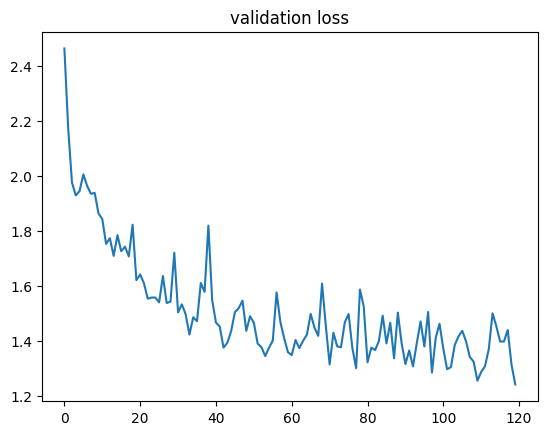

In [ ]:
plt.plot(total_loss)
plt.title("validation loss")
plt.show()

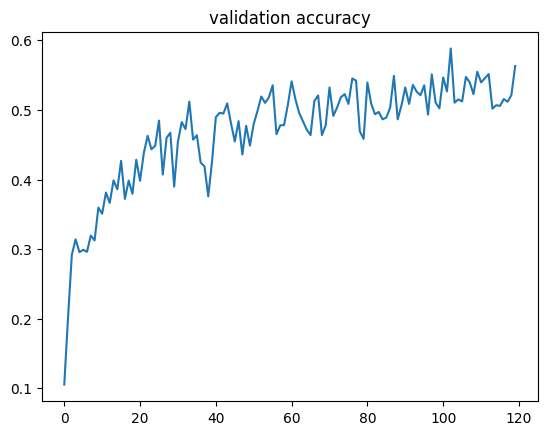

In [ ]:
plt.plot(total_acc)
plt.title("validation accuracy")
plt.show()

# Testing

In [ ]:
# start testing
model.eval()

acc_array = []
predict_list = []
for imgs, labels in tqdm(test_loader):
    imgs = imgs.to(device)
    labels = labels.to(device) # this labels all "0", fake labels

    # predict from model
    with torch.no_grad():
        pred = model(imgs)

    # calc accuracy
    acc = (pred.argmax(dim=-1) == labels).float().mean()

    # record
    acc_array.append(acc.item())

    # record all perdict
    predict_list.extend(pred.argmax(dim=-1).cpu().numpy().tolist())

avg_acc = sum(acc_array) / len(acc_array)
print(f"average accuracy = ", avg_acc)
print(f"預測結果 :",predict_list)

  0%|          | 0/27 [00:00<?, ?it/s]

average accuracy =  0.12382736360585248
預測結果 : [3, 10, 0, 9, 7, 3, 2, 8, 8, 3, 5, 0, 3, 10, 0, 4, 9, 1, 5, 9, 3, 0, 3, 3, 9, 3, 10, 8, 9, 8, 0, 9, 10, 1, 2, 9, 8, 10, 8, 1, 6, 4, 5, 5, 5, 1, 10, 3, 8, 9, 10, 1, 3, 3, 8, 8, 6, 9, 6, 2, 3, 4, 3, 3, 10, 1, 3, 9, 0, 10, 5, 5, 6, 8, 9, 7, 4, 2, 2, 9, 4, 1, 9, 8, 6, 0, 4, 4, 8, 6, 2, 8, 0, 9, 6, 6, 3, 2, 6, 10, 0, 8, 8, 8, 4, 7, 6, 0, 9, 0, 5, 8, 5, 3, 9, 4, 9, 5, 9, 3, 3, 5, 0, 0, 1, 9, 7, 8, 8, 9, 5, 2, 10, 3, 9, 2, 3, 10, 3, 3, 2, 4, 5, 8, 1, 0, 9, 5, 9, 8, 8, 4, 9, 0, 8, 1, 9, 8, 8, 2, 5, 3, 5, 2, 9, 0, 8, 8, 3, 9, 8, 1, 2, 4, 9, 0, 2, 8, 8, 5, 3, 8, 9, 6, 6, 9, 8, 3, 3, 4, 0, 8, 2, 8, 7, 3, 8, 9, 0, 8, 9, 8, 8, 7, 0, 4, 7, 9, 10, 3, 8, 5, 10, 3, 2, 0, 8, 0, 9, 0, 0, 6, 2, 7, 5, 5, 1, 9, 6, 3, 0, 3, 7, 0, 8, 9, 0, 10, 1, 9, 0, 3, 0, 4, 2, 5, 3, 9, 10, 5, 9, 3, 0, 3, 5, 9, 7, 9, 8, 5, 8, 8, 10, 0, 4, 9, 1, 3, 0, 9, 4, 3, 10, 8, 2, 8, 9, 6, 9, 2, 2, 9, 2, 0, 10, 0, 2, 4, 0, 10, 9, 4, 8, 0, 10, 6, 7, 4, 8, 5, 3, 9, 8, 1, 0, 10, 4, 0, 9, 3, 